___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option("display.max_columns", None)

In [4]:
df_churn= pd.read_csv("1-Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
# Check the first few rows of the dataset
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [7]:
df_churn.isnull().sum()
#Fortunately, there are no NULL or missing values present in the dataset, which is beneficial for our analysis. This means that we have complete data for all the features, allowing us to perform our analysis without the need for imputation or handling missing values.

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:

df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [10]:
df_churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

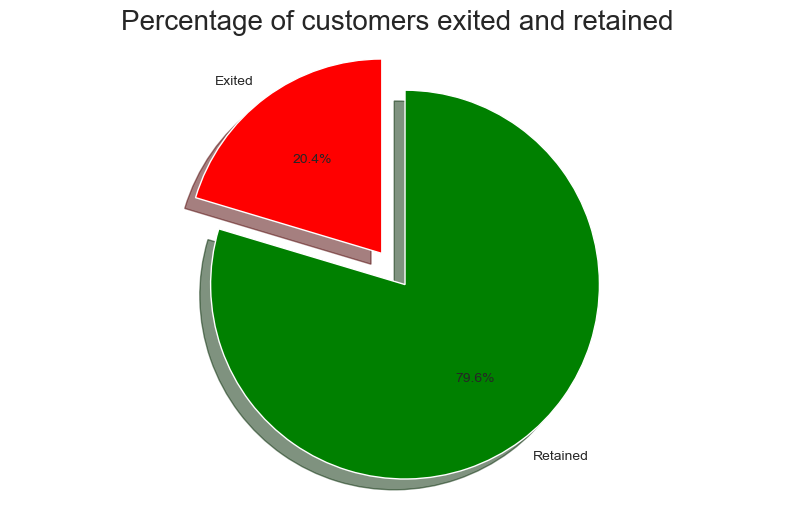

In [11]:
# Pie chart to display the amount (percentage) of customers churned and the ones retained

labels = ['Exited', 'Retained']
sizes = [df_churn.Exited[df_churn['Exited'] == 1].count(), df_churn.Exited[df_churn['Exited'] == 0].count()]
explode = [0.1, 0]

# create and plot the pie chart

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5, colors=['r', 'g'], )
plt.title("Percentage of customers exited and retained", size = 20)
plt.axis('equal')
plt.show()

 Approximately 20% of customers have churned or exited the bank. We can build a machine learning model to predict customer churn based on their banking data.

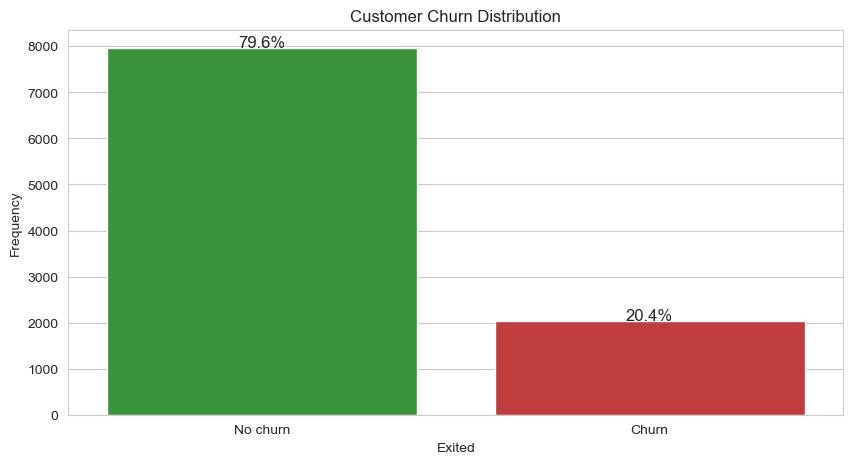

In [12]:
churn_count = df_churn['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.barplot(x=churn_count.index,
            y=churn_count.values,
            palette= [color_palette[2], color_palette[3]]
            ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                xlabel = 'Exited',
                ylabel = 'Frequency',
                title = 'Customer Churn Distribution'
             )

# Add percentage labels
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

# Observation:
    # There is a class imbalance. About 79% of the customers didn't exit
    # while about 20% exited.

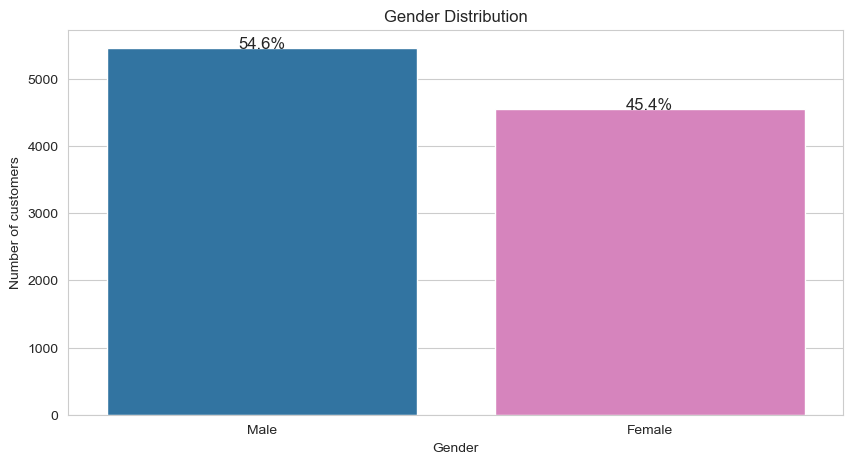

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
color_palette = sns.color_palette()
sns.barplot(x=df_churn['Gender'].value_counts().index,
            y=df_churn['Gender'].value_counts().values,
            palette=[color_palette[0], color_palette[6]]
            ).set(
                ylabel = 'Number of customers',
                xlabel = 'Gender',
                title = 'Gender Distribution'
            )

# Add percentage labels
gender_counts = df_churn['Gender'].value_counts()
total_count = sum(gender_counts.values)
for i, count in enumerate(gender_counts.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

In [14]:
print(df_churn.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


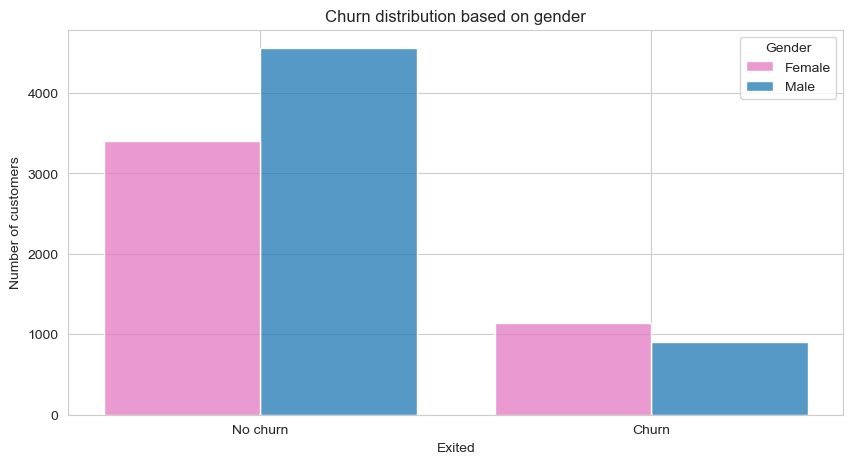

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.histplot(data=df_churn, x='Exited',
             bins=np.arange(3) - 0.5,
             hue='Gender',
             multiple='dodge',
             shrink=.8,
             legend= True,
             palette=[color_palette[6], color_palette[0]]
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on gender'
             );
# Observation:
 # Slightly more males than females didn't exit which is expected since there were more males in the data
 # Slightly more females than males exited.

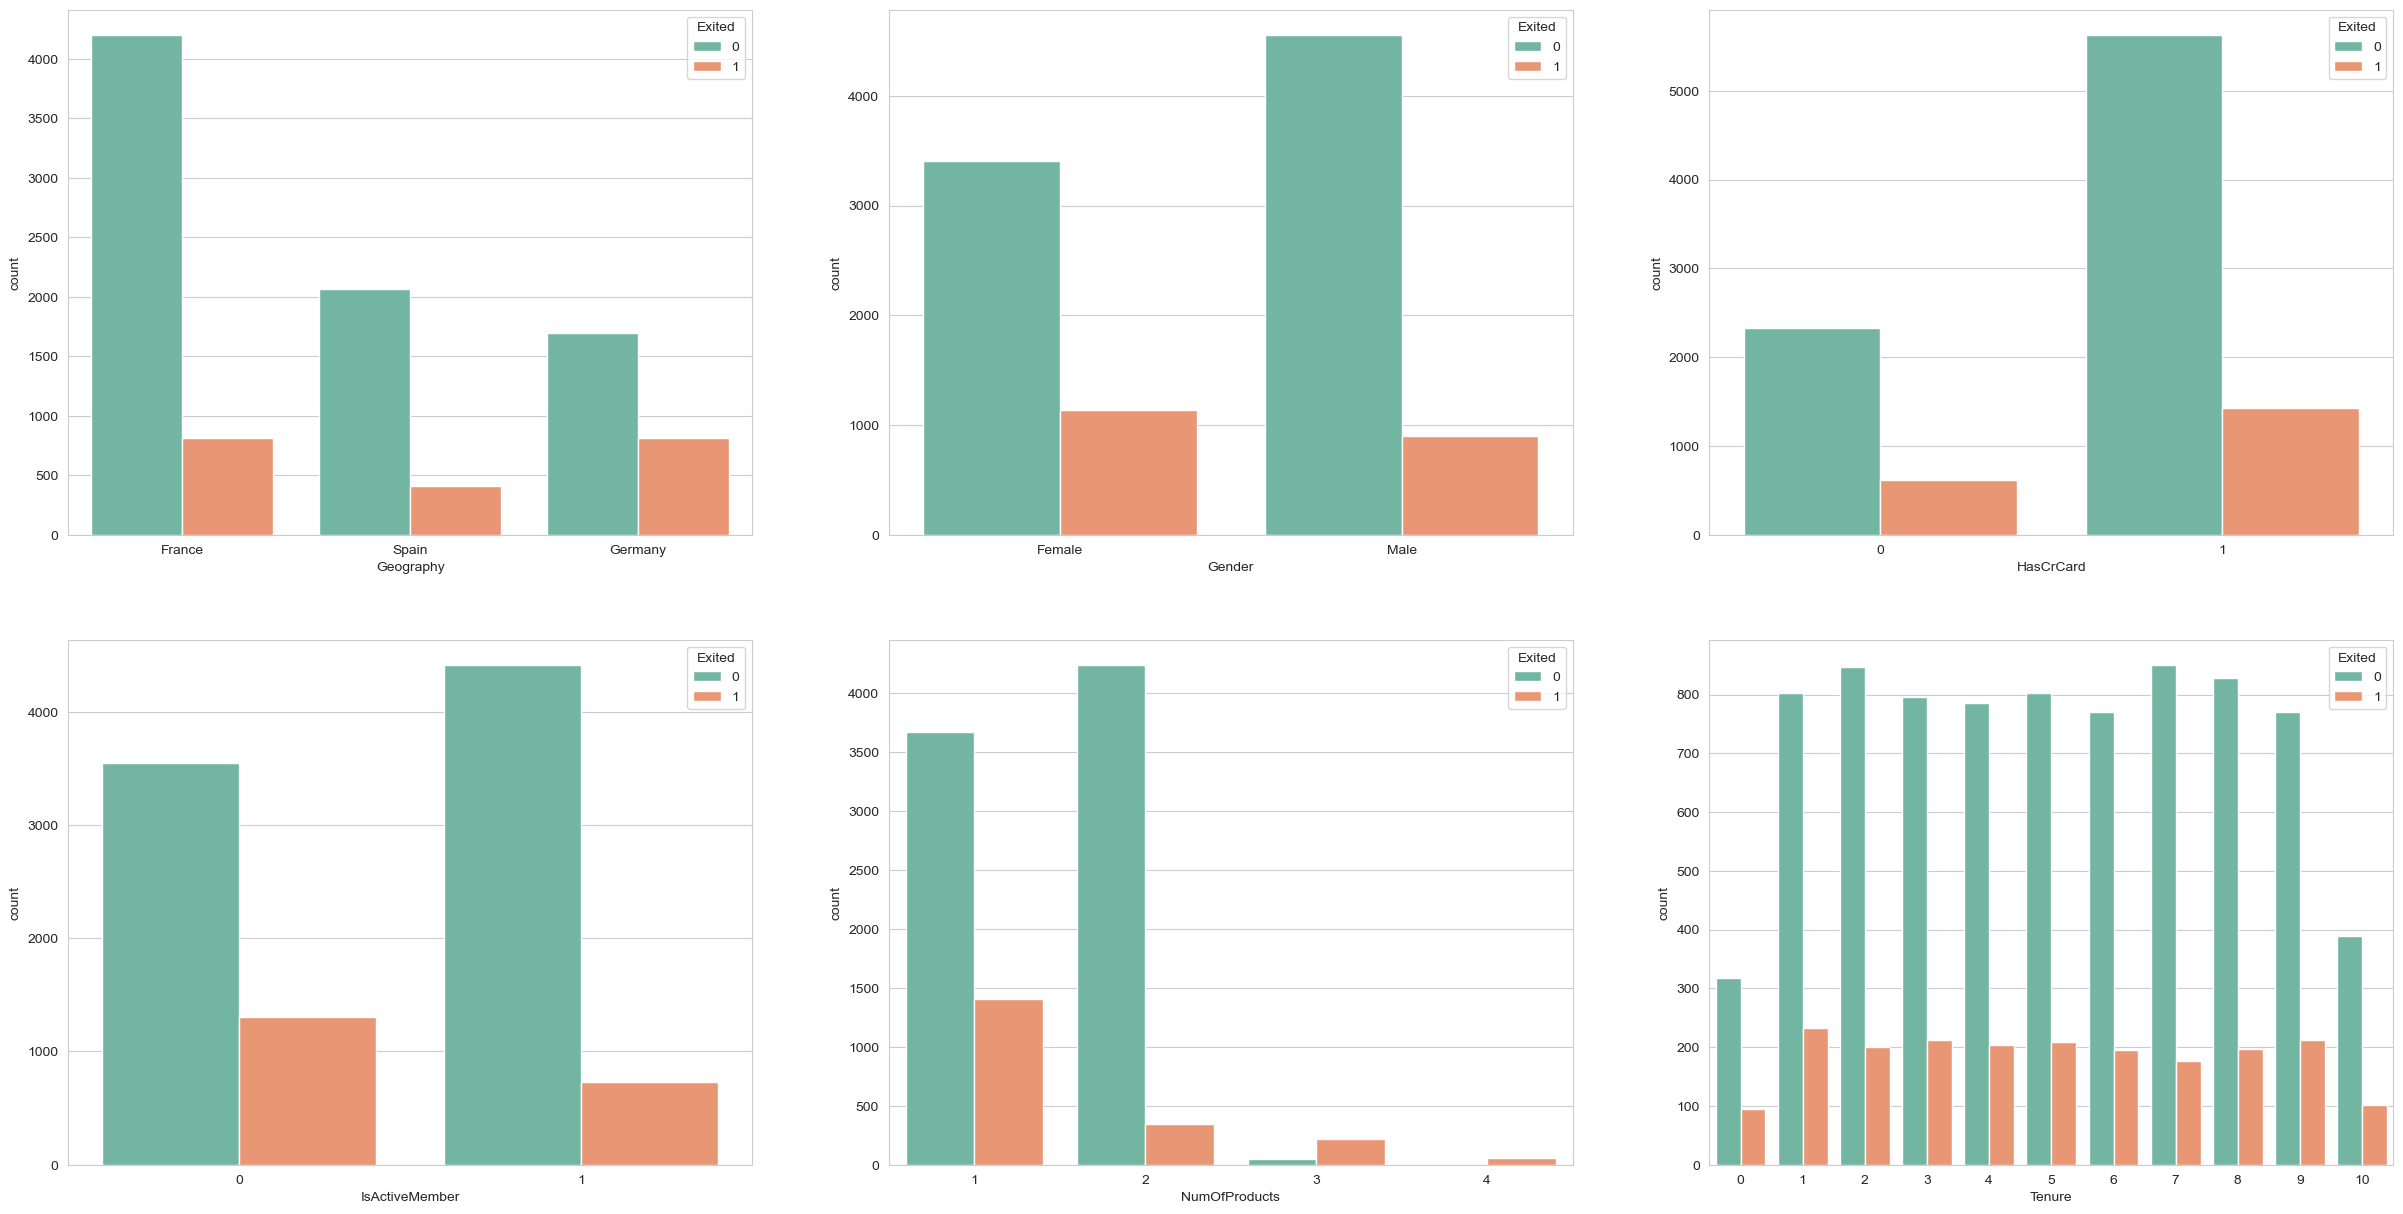

In [16]:
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=df_churn, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df_churn, palette='Set2', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df_churn, palette='Set2', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=df_churn, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df_churn, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df_churn, palette='Set2', ax=ax[1][2])

plt.show()

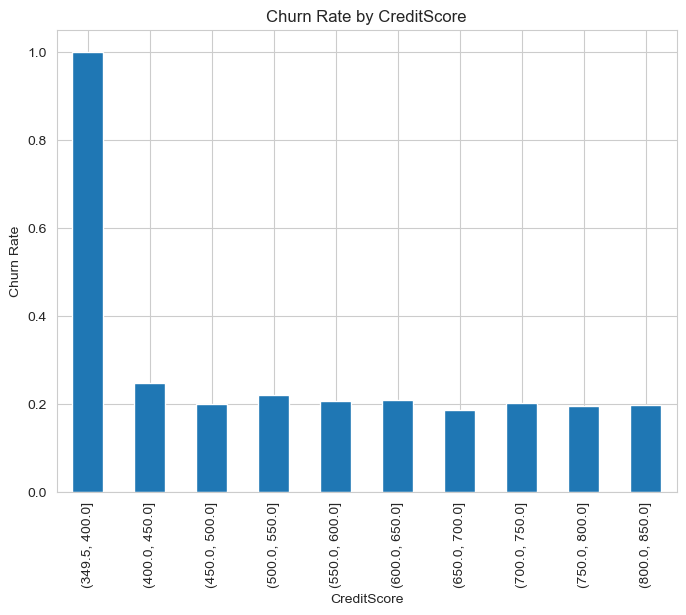

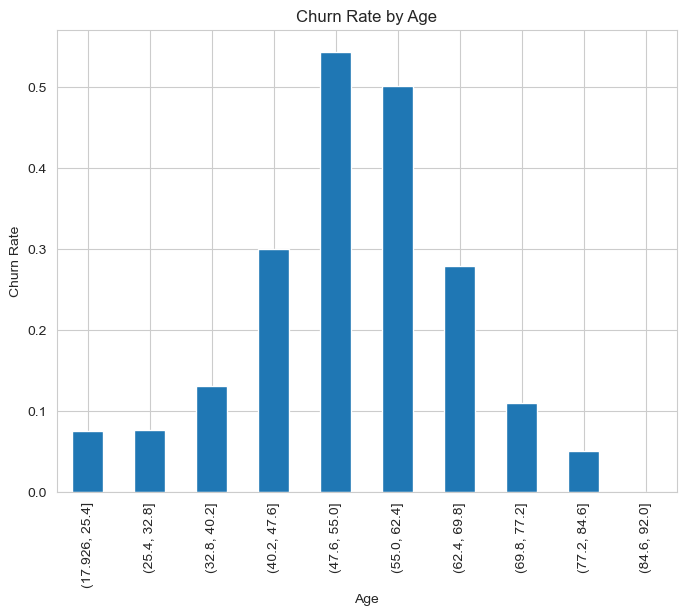

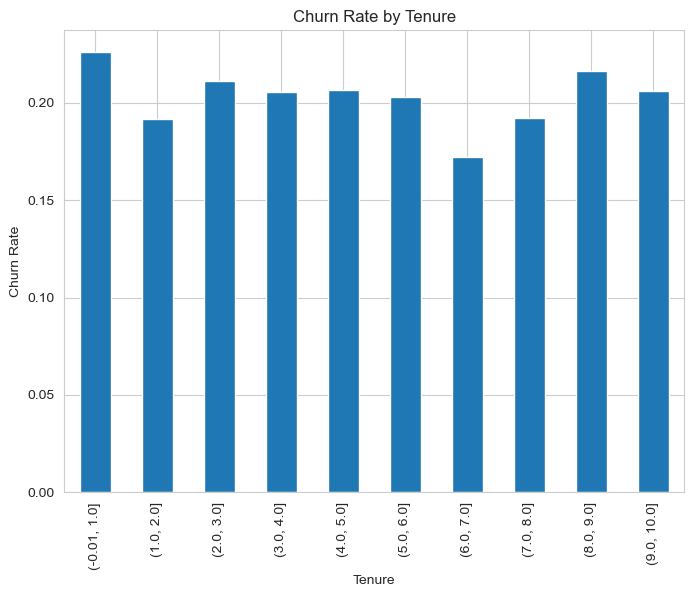

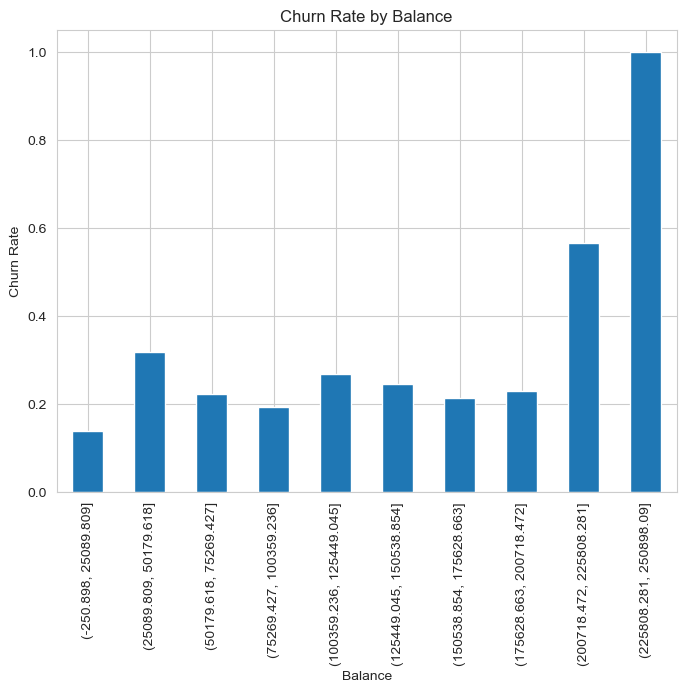

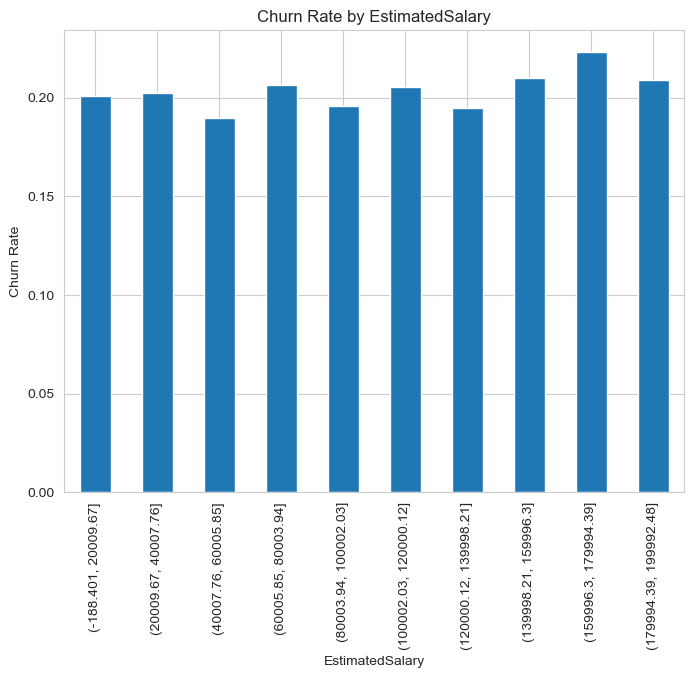

In [17]:
# Continuous and numerical features to analyze
continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Plot churn rate for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    df_churn['bins'] = pd.cut(df_churn[feature], bins=10)
    churn_rate = df_churn.groupby('bins')['Exited'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.show()

# Remove the 'bins' column
df_churn.drop('bins', axis=1, inplace=True)

Here are the observations from the count column plots mapping the dependence of the 'Exited' column on the continuous and numerical features:

- Credit Score: The credit score does not appear to have a significant impact on customer churn.

- Age: Older customers are more likely to churn from the bank, indicating a potential preference for younger customers within the organization.

- Balance: Customers with higher balances in their accounts are more likely to churn. This could have implications for the bank's capital and revenue.

- Estimated Salary: The estimated salary does not seem to have a strong influence on customer churn.

- Number of Products: The number of products does not appear to significantly impact customer churn.

- Tenure: Customers with shorter or longer tenure periods (new joinees and long-term customers) are more likely to churn.

In summary, age, balance, and tenure seem to be the factors most associated with customer churn. The bank may want to focus on retaining older customers, implementing strategies to retain customers with high balances, and addressing issues related to shorter and longer tenure periods to reduce churn.

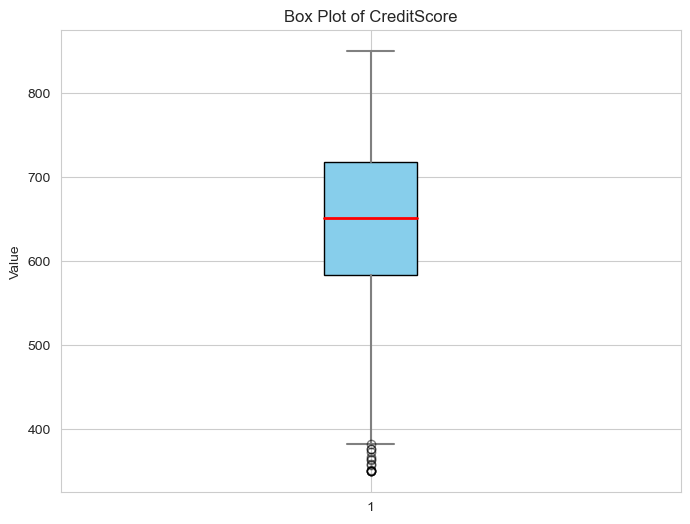

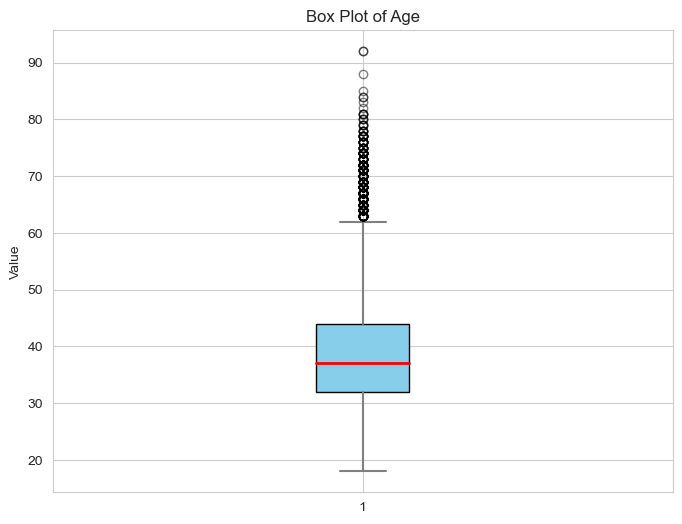

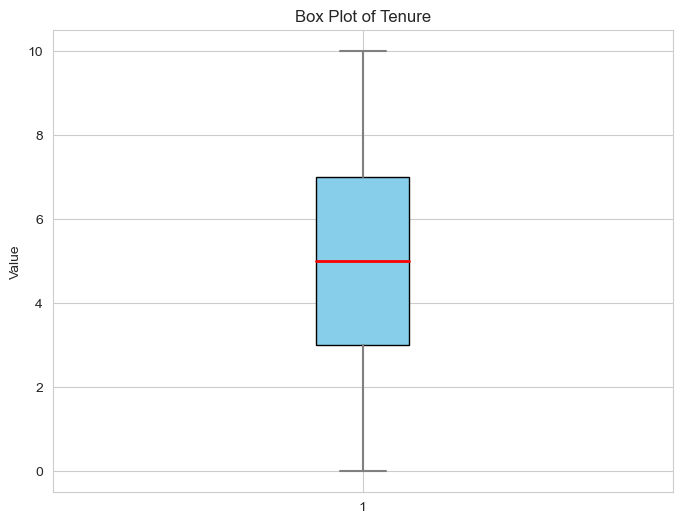

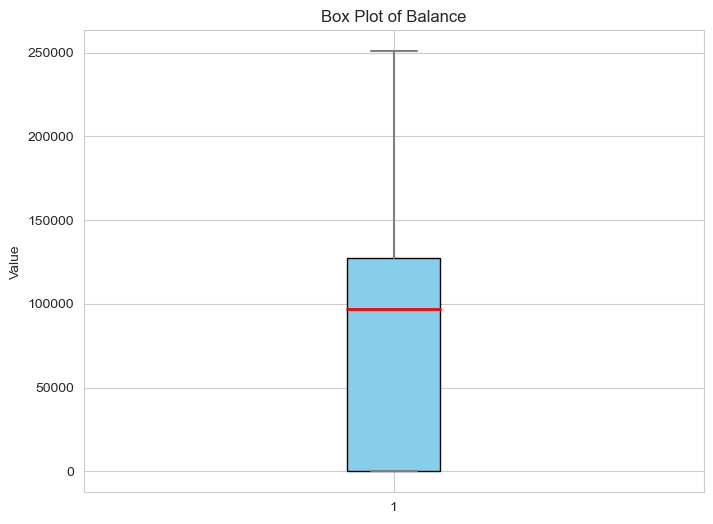

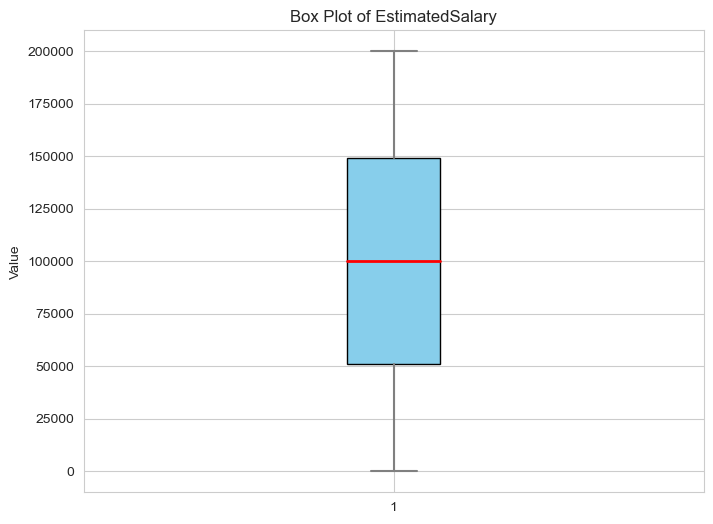

In [18]:
import matplotlib.pyplot as plt

# Continuous and numerical features to analyze
continuous_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Define colors for the box plots
box_colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan']

# Create separate box plots for each continuous feature
for i, feature in enumerate(continuous_features):
    plt.figure(figsize=(8, 6))

    # Plot the box plot with custom colors
    boxplot = plt.boxplot(df_churn[feature], patch_artist=True)

    # Customize the colors of the boxes and whiskers
    for patch, color in zip(boxplot['boxes'], box_colors):
        patch.set_facecolor(color)
    for whisker in boxplot['whiskers']:
        whisker.set(color='gray', linewidth=1.5, linestyle='-')
    for cap in boxplot['caps']:
        cap.set(color='gray', linewidth=1.5)
    for median in boxplot['medians']:
        median.set(color='red', linewidth=2)
    for flier in boxplot['fliers']:
        flier.set(marker='o', color='black', alpha=0.5)

    plt.title(f'Box Plot of {feature}')
    plt.ylabel('Value')
    plt.show()

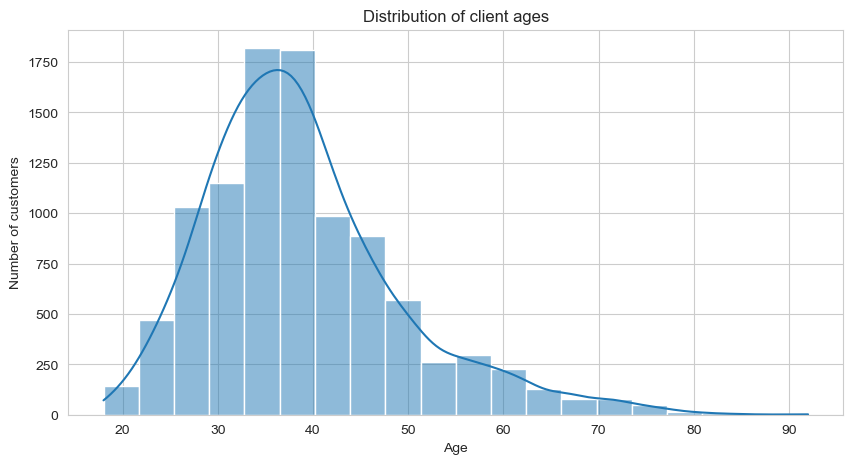

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_churn,
             x ='Age',
             bins=20,
             ax=ax,
             kde=True
             ).set(
                xlabel = 'Age',
                ylabel = 'Number of customers',
                title = 'Distribution of client ages'
             );

In [20]:
bins = [18, 30, 40, 50, 60, 100]  # Define the bin edges
labels = ['18-30', '31-40', '41-50', '51-60', '61+']  # Define the labels for each bin

df_churn['Age Group'] = pd.cut(df_churn['Age'], bins=bins, labels=labels, right=False)

# Print the modified DataFrame
df_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1,41-50
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0,18-30


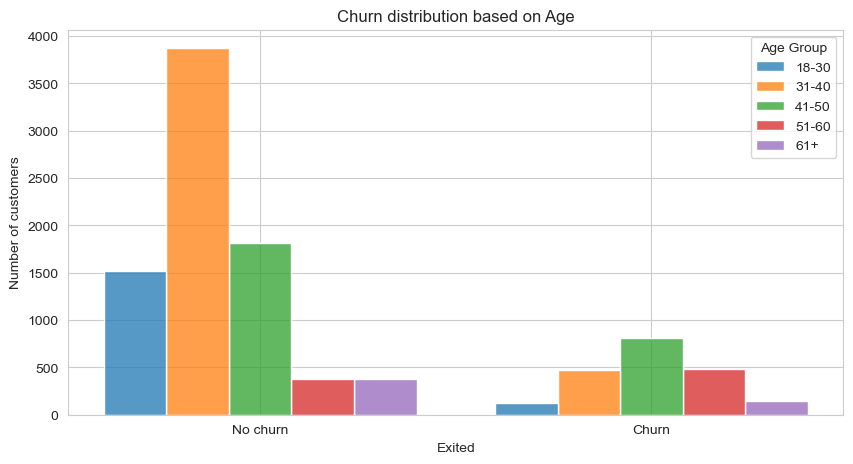

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df_churn, x='Exited',
             bins=np.arange(3) - 0.5,
             hue='Age Group',
             multiple='dodge',
             shrink=.8,
             legend= True
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on Age'
             );

In [22]:
# We can exclude the columns 'RowNumber', 'CustomerId', and 'Surname' from our analysis as they contain personal information of the customers and do not provide any quantitative impact on calculations or modeling. By removing these columns, we can focus on the relevant features that are more directly related to the target variable.
df_churn.drop(['RowNumber', 'CustomerId', 'Surname','Age Group'], axis=1, inplace=True)
# i drop cloulms age group that i created before for viulizing

In [23]:
cont_cols = [i for i in df_churn.columns if df_churn[i].dtype in ['float64', 'int64']]
cont_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

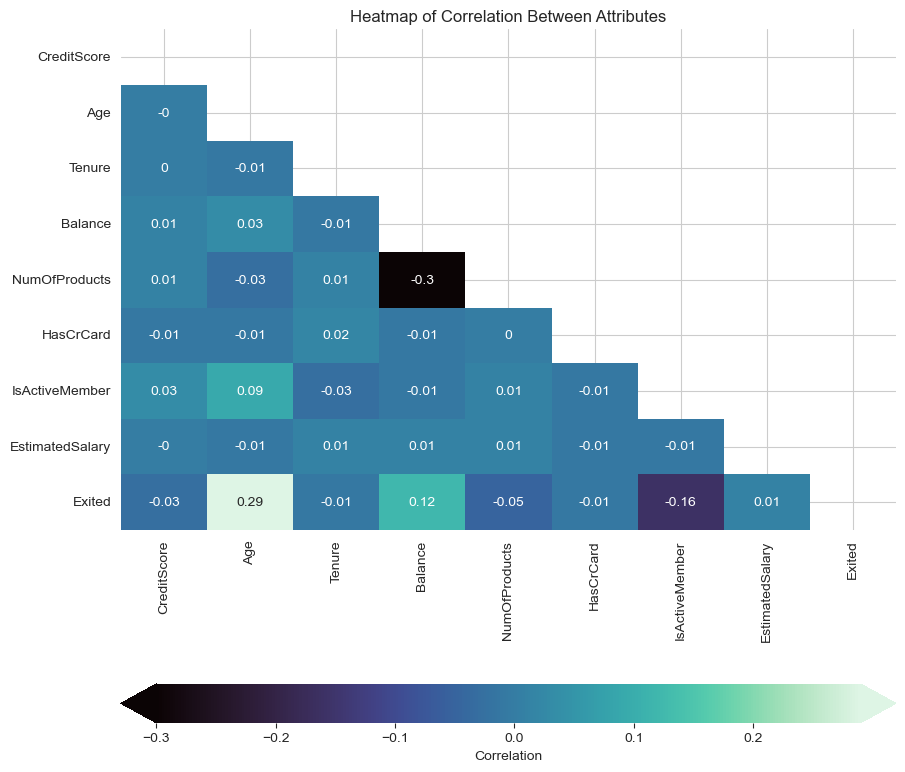

In [24]:
corr = round(df_churn[cont_cols].corr(), 2)

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10,10))

# Plotting a heatmap of the correlation matrix(train_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,

    # Specifying that the labels should be shown too.
    annot=True,

    # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}

)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

# Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
[i for i in df_churn.columns if df_churn[i].dtype in ['O']]

['Geography', 'Gender']

# for descoving the categorical by manwal or encoder
i give 1 for male and 0 for female

In [26]:
#df_churn['Gender'] = df_churn['Gender'].replace({'Male': 1, 'Female':0})
#df_churn['Gender'].value_counts()

In [27]:
#df_churn['Geography'].value_counts()

#for Geography i put France (1),Germany(2)and apain(3)

In [28]:
#df_churn['Geography'] = df_churn['Geography'].replace({'France': 1, 'Germany':2, 'Spain':3})

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_churn is your DataFrame
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df_churn[['Geography', 'Gender']])

# Generate meaningful column names for the encoded features
column_names = encoder.get_feature_names_out(['Geography', 'Gender'])
encoded_df = pd.DataFrame(encoded_features, columns=column_names)

# Concatenate the encoded features with the original DataFrame
df_churn = pd.concat([df_churn, encoded_df], axis=1)

# Drop the original 'Geography' and 'Gender' columns
df_churn = df_churn.drop(['Geography', 'Gender'], axis=1)


In [30]:
df_churn.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany    float64
Geography_Spain      float64
Gender_Male          float64
dtype: object

# now spliting and normalizing data

In [31]:
X=df_churn.drop(columns=['Exited'], axis=1)
y=df_churn['Exited']

In [32]:
seed=25

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=seed
)

The code you've provided is splitting your data into training and validation sets using the train_test_split function. 

In [34]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1476,756,26,5,101641.140,2,0,1,154460.680,0.000,0.000,0.000
2408,653,55,7,0.000,2,1,1,41967.030,0.000,1.000,1.000
9192,801,58,1,79954.610,2,1,1,30484.190,0.000,1.000,1.000
224,671,45,6,99564.220,1,1,1,108872.450,1.000,0.000,1.000
4833,762,32,10,191775.650,1,1,0,179657.830,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
3481,729,34,9,53299.960,2,1,1,42855.970,0.000,1.000,0.000
6915,658,31,2,77082.650,2,0,0,13482.280,1.000,0.000,1.000
5250,462,24,9,69881.090,2,0,1,64421.020,1.000,0.000,0.000
3967,602,32,10,0.000,2,1,1,116052.920,0.000,0.000,1.000


In [35]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9913,718,44,1,133866.220,1,0,1,139049.240,0.000,0.000,0.000
2041,840,39,1,94968.970,1,1,0,84487.620,0.000,0.000,0.000
1727,676,36,4,0.000,2,1,1,3173.310,0.000,1.000,0.000
4807,611,28,2,0.000,2,0,0,25395.830,0.000,0.000,1.000
8629,651,23,4,115636.050,2,1,0,70400.860,0.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...
8520,634,52,1,0.000,2,1,1,176913.420,0.000,1.000,1.000
5694,660,31,6,172325.670,1,0,1,45438.380,0.000,0.000,0.000
1663,700,40,4,148571.070,1,1,0,189826.960,1.000,0.000,0.000
2213,498,41,4,87541.060,2,1,1,12577.210,1.000,0.000,0.000


In [36]:
X_train.shape

(9000, 11)

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler is good for outers
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)



# Modelling & Model Performance

## without class_weigth

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score,recall_score
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV
from tensorflow.keras.optimizers.legacy import Adam

In [39]:

from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on the test and training sets
    y_pred = model.predict(X_test) > 0.5
    y_train_pred = model.predict(X_train) > 0.5
    y_pred_p = model.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot and display the confusion matrix for the test set with a specific color map
    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Greens', ax=axes[0])  # Change 'Greens' to your desired color map
    axes[0].set_title('Test Set Confusion Matrix')

    # Plot and display the confusion matrix for the training set with a specific color map
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])  # Change 'Blues' to your desired color map
    axes[1].set_title('Training Set Confusion Matrix')

    plt.show()

    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_pred)

    print(f'''
-----------------------------Train Results-----------------------------
{train_report}

-----------------------------Test Results-----------------------------
{test_report}
''')
    print('-----------------------------precision_recall_curve-----------------------------')
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_p)
    plt.plot(recalls, precisions, label='ANN')
    plt.xlabel('Recalls')
    plt.ylabel('Precisions')
    plt.title('Precision-Recall Curve')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    print('-----------------------------Receiver Operating Characteristic-----------------------------')

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()



### Create The Model

In [41]:

import os
import random
def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

In [42]:
model = Sequential(
    [
        Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit( x=X_train, y=y_train, validation_split=0.3, epochs=1000, batch_size=25, verbose=1)

Epoch 1/1000
252/252 [==============================] - 2s 3ms/step - loss: 0.5337 - recall: 0.0934 - val_loss: 0.4953 - val_recall: 0.0000e+00
Epoch 2/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4611 - recall: 0.0072 - val_loss: 0.4803 - val_recall: 0.0379
Epoch 3/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4486 - recall: 0.0790 - val_loss: 0.4709 - val_recall: 0.0741
Epoch 4/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4383 - recall: 0.1245 - val_loss: 0.4589 - val_recall: 0.1483
Epoch 5/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4280 - recall: 0.1660 - val_loss: 0.4511 - val_recall: 0.1879
Epoch 6/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4194 - recall: 0.1907 - val_loss: 0.4461 - val_recall: 0.2724
Epoch 7/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4113 - recall: 0.2410 - val_loss: 0.4392 - val_recall: 0.2621
Epoch 8/1000
252

252/252 [==============================] - 1s 2ms/step - loss: 0.3169 - recall: 0.4972 - val_loss: 0.3629 - val_recall: 0.4431
Epoch 118/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3163 - recall: 0.5052 - val_loss: 0.3591 - val_recall: 0.4690
Epoch 119/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3161 - recall: 0.5004 - val_loss: 0.3637 - val_recall: 0.4259
Epoch 120/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3161 - recall: 0.5004 - val_loss: 0.3837 - val_recall: 0.3776
Epoch 121/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3185 - recall: 0.4988 - val_loss: 0.4047 - val_recall: 0.3466
Epoch 122/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3162 - recall: 0.4932 - val_loss: 0.3701 - val_recall: 0.5655
Epoch 123/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3157 - recall: 0.4964 - val_loss: 0.3619 - val_recall: 0.4500
Epoch 124/1000
252/25

Epoch 175/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3115 - recall: 0.5060 - val_loss: 0.3615 - val_recall: 0.5000
Epoch 176/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3124 - recall: 0.4980 - val_loss: 0.3650 - val_recall: 0.4397
Epoch 177/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3102 - recall: 0.5028 - val_loss: 0.3647 - val_recall: 0.4328
Epoch 178/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3118 - recall: 0.5068 - val_loss: 0.3635 - val_recall: 0.4397
Epoch 179/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3109 - recall: 0.5028 - val_loss: 0.3652 - val_recall: 0.4310
Epoch 180/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3124 - recall: 0.5076 - val_loss: 0.3624 - val_recall: 0.4397
Epoch 181/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3111 - recall: 0.5028 - val_loss: 0.3659 - val_recall: 0.4293
Epoch 

Epoch 233/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3061 - recall: 0.5132 - val_loss: 0.3714 - val_recall: 0.5052
Epoch 234/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3083 - recall: 0.5180 - val_loss: 0.3764 - val_recall: 0.4121
Epoch 235/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3078 - recall: 0.5028 - val_loss: 0.3649 - val_recall: 0.4776
Epoch 236/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3066 - recall: 0.5164 - val_loss: 0.3669 - val_recall: 0.4466
Epoch 237/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3072 - recall: 0.5092 - val_loss: 0.3667 - val_recall: 0.4552
Epoch 238/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3077 - recall: 0.5196 - val_loss: 0.3652 - val_recall: 0.4672
Epoch 239/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3067 - recall: 0.5164 - val_loss: 0.3652 - val_recall: 0.4655
Epoch 

Epoch 291/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3050 - recall: 0.5251 - val_loss: 0.3729 - val_recall: 0.4431
Epoch 292/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3046 - recall: 0.5188 - val_loss: 0.3694 - val_recall: 0.4328
Epoch 293/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3043 - recall: 0.5395 - val_loss: 0.3789 - val_recall: 0.4017
Epoch 294/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3054 - recall: 0.5060 - val_loss: 0.3705 - val_recall: 0.4690
Epoch 295/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3047 - recall: 0.5132 - val_loss: 0.3699 - val_recall: 0.4552
Epoch 296/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3044 - recall: 0.5148 - val_loss: 0.3695 - val_recall: 0.4983
Epoch 297/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3043 - recall: 0.5235 - val_loss: 0.3679 - val_recall: 0.4672
Epoch 

Epoch 406/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3015 - recall: 0.5283 - val_loss: 0.3742 - val_recall: 0.4517
Epoch 407/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3019 - recall: 0.5259 - val_loss: 0.3769 - val_recall: 0.4379
Epoch 408/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2990 - recall: 0.5251 - val_loss: 0.3770 - val_recall: 0.4207
Epoch 409/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2998 - recall: 0.5299 - val_loss: 0.3749 - val_recall: 0.4707
Epoch 410/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3000 - recall: 0.5331 - val_loss: 0.3770 - val_recall: 0.5103
Epoch 411/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3017 - recall: 0.5371 - val_loss: 0.3739 - val_recall: 0.4500
Epoch 412/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3012 - recall: 0.5227 - val_loss: 0.3834 - val_recall: 0.4241
Epoch 

Epoch 464/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2994 - recall: 0.5283 - val_loss: 0.3866 - val_recall: 0.4069
Epoch 465/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2974 - recall: 0.5267 - val_loss: 0.3907 - val_recall: 0.3810
Epoch 466/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3007 - recall: 0.5243 - val_loss: 0.3724 - val_recall: 0.4655
Epoch 467/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2974 - recall: 0.5443 - val_loss: 0.3782 - val_recall: 0.4276
Epoch 468/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2985 - recall: 0.5291 - val_loss: 0.3749 - val_recall: 0.4690
Epoch 469/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2985 - recall: 0.5323 - val_loss: 0.3723 - val_recall: 0.4621
Epoch 470/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2975 - recall: 0.5475 - val_loss: 0.3721 - val_recall: 0.4759
Epoch 

Epoch 522/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2989 - recall: 0.5331 - val_loss: 0.4046 - val_recall: 0.3690
Epoch 523/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2985 - recall: 0.5307 - val_loss: 0.3752 - val_recall: 0.4724
Epoch 524/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2979 - recall: 0.5347 - val_loss: 0.3764 - val_recall: 0.4448
Epoch 525/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2970 - recall: 0.5259 - val_loss: 0.3723 - val_recall: 0.4621
Epoch 526/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2970 - recall: 0.5315 - val_loss: 0.3760 - val_recall: 0.4517
Epoch 527/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2970 - recall: 0.5347 - val_loss: 0.3770 - val_recall: 0.4448
Epoch 528/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2961 - recall: 0.5315 - val_loss: 0.3776 - val_recall: 0.4672
Epoch 

Epoch 580/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2963 - recall: 0.5299 - val_loss: 0.3800 - val_recall: 0.4569
Epoch 581/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2949 - recall: 0.5307 - val_loss: 0.3862 - val_recall: 0.4138
Epoch 582/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2959 - recall: 0.5355 - val_loss: 0.3776 - val_recall: 0.4897
Epoch 583/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2964 - recall: 0.5331 - val_loss: 0.3875 - val_recall: 0.5362
Epoch 584/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2956 - recall: 0.5467 - val_loss: 0.3748 - val_recall: 0.4621
Epoch 585/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2952 - recall: 0.5347 - val_loss: 0.3761 - val_recall: 0.4690
Epoch 586/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2978 - recall: 0.5339 - val_loss: 0.3745 - val_recall: 0.4621
Epoch 

Epoch 638/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2935 - recall: 0.5491 - val_loss: 0.3758 - val_recall: 0.4241
Epoch 639/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2936 - recall: 0.5339 - val_loss: 0.3794 - val_recall: 0.4879
Epoch 640/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2934 - recall: 0.5411 - val_loss: 0.3753 - val_recall: 0.4931
Epoch 641/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2960 - recall: 0.5371 - val_loss: 0.3763 - val_recall: 0.4828
Epoch 642/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2948 - recall: 0.5283 - val_loss: 0.3788 - val_recall: 0.4914
Epoch 643/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2954 - recall: 0.5395 - val_loss: 0.3781 - val_recall: 0.4534
Epoch 644/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2948 - recall: 0.5323 - val_loss: 0.3769 - val_recall: 0.4466
Epoch 

Epoch 696/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2931 - recall: 0.5395 - val_loss: 0.3806 - val_recall: 0.4638
Epoch 697/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2936 - recall: 0.5363 - val_loss: 0.3855 - val_recall: 0.4241
Epoch 698/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2930 - recall: 0.5299 - val_loss: 0.3788 - val_recall: 0.4483
Epoch 699/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2936 - recall: 0.5483 - val_loss: 0.3911 - val_recall: 0.4103
Epoch 700/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2924 - recall: 0.5419 - val_loss: 0.3881 - val_recall: 0.4569
Epoch 701/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2926 - recall: 0.5435 - val_loss: 0.3796 - val_recall: 0.4914
Epoch 702/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2928 - recall: 0.5435 - val_loss: 0.3808 - val_recall: 0.4397
Epoch 

Epoch 754/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2930 - recall: 0.5331 - val_loss: 0.3847 - val_recall: 0.4414
Epoch 755/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2935 - recall: 0.5331 - val_loss: 0.3777 - val_recall: 0.4552
Epoch 756/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2937 - recall: 0.5323 - val_loss: 0.3781 - val_recall: 0.5017
Epoch 757/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2915 - recall: 0.5435 - val_loss: 0.3838 - val_recall: 0.4190
Epoch 758/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2922 - recall: 0.5395 - val_loss: 0.3915 - val_recall: 0.4241
Epoch 759/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2918 - recall: 0.5419 - val_loss: 0.3845 - val_recall: 0.4379
Epoch 760/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2931 - recall: 0.5347 - val_loss: 0.3774 - val_recall: 0.4810
Epoch 

Epoch 812/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2930 - recall: 0.5563 - val_loss: 0.3902 - val_recall: 0.4034
Epoch 813/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2904 - recall: 0.5331 - val_loss: 0.3906 - val_recall: 0.4000
Epoch 814/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2916 - recall: 0.5419 - val_loss: 0.3826 - val_recall: 0.4793
Epoch 815/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2901 - recall: 0.5467 - val_loss: 0.3822 - val_recall: 0.4586
Epoch 816/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2927 - recall: 0.5355 - val_loss: 0.3891 - val_recall: 0.4310
Epoch 817/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2923 - recall: 0.5475 - val_loss: 0.3831 - val_recall: 0.4603
Epoch 818/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2917 - recall: 0.5355 - val_loss: 0.3873 - val_recall: 0.4431
Epoch 

Epoch 870/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2908 - recall: 0.5419 - val_loss: 0.3864 - val_recall: 0.4672
Epoch 871/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2905 - recall: 0.5363 - val_loss: 0.3830 - val_recall: 0.4638
Epoch 872/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2912 - recall: 0.5499 - val_loss: 0.3845 - val_recall: 0.4500
Epoch 873/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2902 - recall: 0.5395 - val_loss: 0.3879 - val_recall: 0.4155
Epoch 874/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2899 - recall: 0.5363 - val_loss: 0.3883 - val_recall: 0.4621
Epoch 875/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2897 - recall: 0.5523 - val_loss: 0.3839 - val_recall: 0.4707
Epoch 876/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2893 - recall: 0.5435 - val_loss: 0.3868 - val_recall: 0.4310
Epoch 

Epoch 928/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2900 - recall: 0.5395 - val_loss: 0.3895 - val_recall: 0.4414
Epoch 929/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2894 - recall: 0.5363 - val_loss: 0.3880 - val_recall: 0.4517
Epoch 930/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2899 - recall: 0.5371 - val_loss: 0.3865 - val_recall: 0.4862
Epoch 931/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2908 - recall: 0.5419 - val_loss: 0.3867 - val_recall: 0.4845
Epoch 932/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2889 - recall: 0.5363 - val_loss: 0.3873 - val_recall: 0.5034
Epoch 933/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2897 - recall: 0.5499 - val_loss: 0.3876 - val_recall: 0.4259
Epoch 934/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2908 - recall: 0.5451 - val_loss: 0.3942 - val_recall: 0.4086
Epoch 

Epoch 986/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2905 - recall: 0.5355 - val_loss: 0.3879 - val_recall: 0.4397
Epoch 987/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2894 - recall: 0.5379 - val_loss: 0.3855 - val_recall: 0.4707
Epoch 988/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2876 - recall: 0.5411 - val_loss: 0.3897 - val_recall: 0.4759
Epoch 989/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2909 - recall: 0.5339 - val_loss: 0.3888 - val_recall: 0.4690
Epoch 990/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2885 - recall: 0.5451 - val_loss: 0.3901 - val_recall: 0.4310
Epoch 991/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.2883 - recall: 0.5379 - val_loss: 0.3864 - val_recall: 0.4431
Epoch 992/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.2886 - recall: 0.5467 - val_loss: 0.3843 - val_recall: 0.4724
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.534,0.093,0.495,0.000
1,0.461,0.007,0.480,0.038
2,0.449,0.079,0.471,0.074
3,0.438,0.125,0.459,0.148
4,0.428,0.166,0.451,0.188


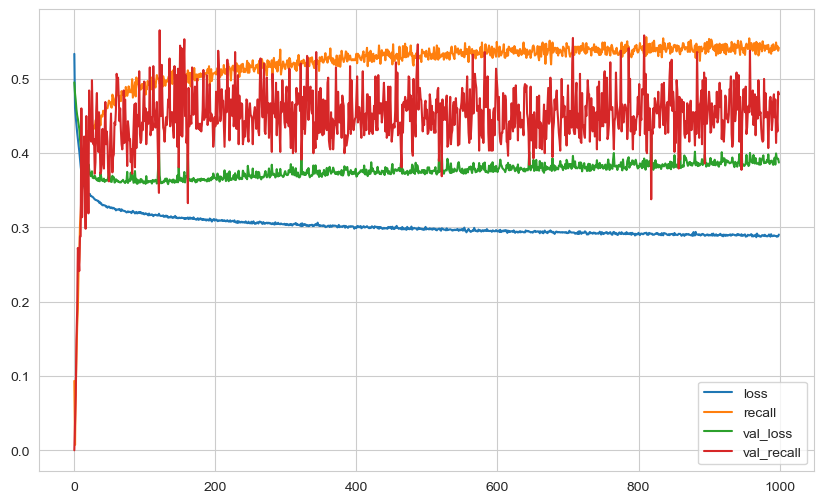

In [46]:
loss_df.plot()
plt.show()

# ROC and AUC

32/32 [==============================] - 0s 963us/step


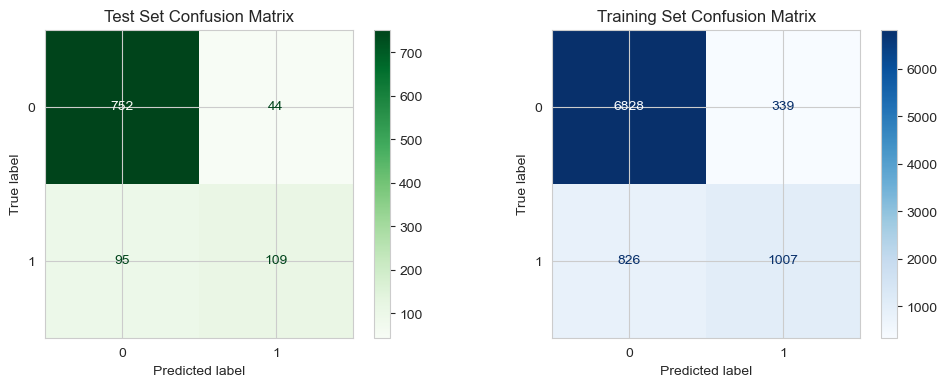


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7167
           1       0.75      0.55      0.63      1833

    accuracy                           0.87      9000
   macro avg       0.82      0.75      0.78      9000
weighted avg       0.86      0.87      0.86      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       796
           1       0.71      0.53      0.61       204

    accuracy                           0.86      1000
   macro avg       0.80      0.74      0.76      1000
weighted avg       0.85      0.86      0.85      1000


-----------------------------precision_recall_curve-----------------------------


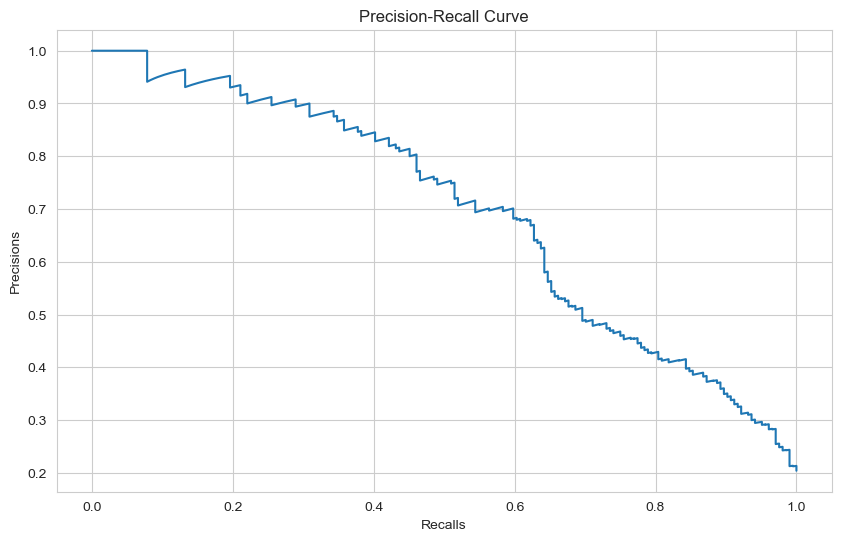

-----------------------------Receiver Operating Characteristic-----------------------------


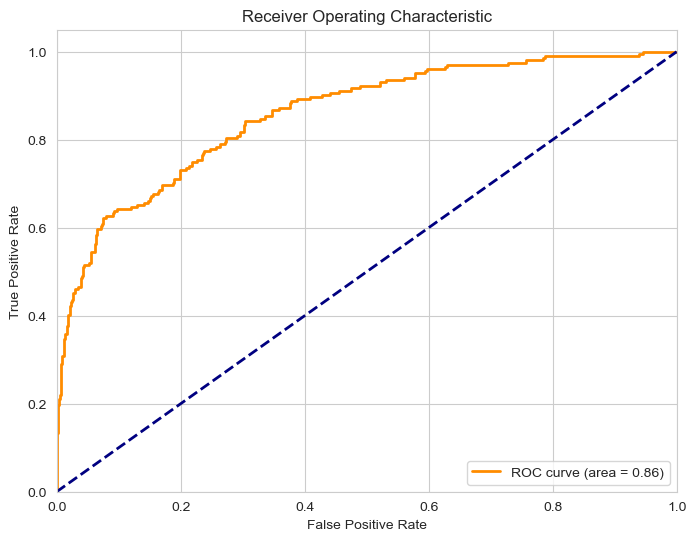

In [48]:
evaluate_classification_model(model, X_train, y_train, X_test, y_test)

In [49]:
model.evaluate(X_test, y_test, verbose=0)

[0.35449615120887756, 0.5343137383460999]

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.35449615120887756
accuracy:  0.5343137383460999


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight

In [42]:
model2 = Sequential(
    [
       Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])

In [43]:
class_weight = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight = {0: class_weight[0], 1: class_weight[1]}

In [44]:
class_weight

{0: 0.6278777731268314, 1: 2.454991816693944}

In [45]:
# Train your model with class weights
model2.fit(X_train, y_train, validation_split=0.3, epochs=1000, batch_size=25, verbose=1, class_weight=class_weight)

Epoch 1/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.6659 - recall: 0.6864 - val_loss: 0.6889 - val_recall: 0.5810
Epoch 2/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.6263 - recall: 0.6169 - val_loss: 0.5933 - val_recall: 0.5534
Epoch 3/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5895 - recall: 0.6632 - val_loss: 0.5588 - val_recall: 0.6069
Epoch 4/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5636 - recall: 0.6872 - val_loss: 0.5010 - val_recall: 0.5483
Epoch 5/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5481 - recall: 0.6903 - val_loss: 0.5912 - val_recall: 0.7466
Epoch 6/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5306 - recall: 0.7199 - val_loss: 0.5941 - val_recall: 0.7672
Epoch 7/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5146 - recall: 0.7287 - val_loss: 0.5008 - val_recall: 0.6793
Epoch 8/1000
252/252

252/252 [==============================] - 0s 1ms/step - loss: 0.4416 - recall: 0.7670 - val_loss: 0.4356 - val_recall: 0.7086
Epoch 60/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4401 - recall: 0.7654 - val_loss: 0.4564 - val_recall: 0.7310
Epoch 61/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4397 - recall: 0.7662 - val_loss: 0.4869 - val_recall: 0.7655
Epoch 62/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4391 - recall: 0.7725 - val_loss: 0.4462 - val_recall: 0.7155
Epoch 63/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4399 - recall: 0.7654 - val_loss: 0.4763 - val_recall: 0.7448
Epoch 64/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4371 - recall: 0.7717 - val_loss: 0.4489 - val_recall: 0.7155
Epoch 65/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4376 - recall: 0.7717 - val_loss: 0.4428 - val_recall: 0.7103
Epoch 66/1000
252/252 [====

252/252 [==============================] - 0s 1ms/step - loss: 0.4252 - recall: 0.7709 - val_loss: 0.5060 - val_recall: 0.7603
Epoch 118/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4287 - recall: 0.7702 - val_loss: 0.4425 - val_recall: 0.6931
Epoch 119/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4255 - recall: 0.7861 - val_loss: 0.4746 - val_recall: 0.7362
Epoch 120/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4257 - recall: 0.7717 - val_loss: 0.4582 - val_recall: 0.7172
Epoch 121/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4268 - recall: 0.7773 - val_loss: 0.4326 - val_recall: 0.6845
Epoch 122/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4241 - recall: 0.7733 - val_loss: 0.4906 - val_recall: 0.7414
Epoch 123/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4247 - recall: 0.7813 - val_loss: 0.4623 - val_recall: 0.7172
Epoch 124/1000
252/25

Epoch 175/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4178 - recall: 0.7829 - val_loss: 0.4670 - val_recall: 0.7190
Epoch 176/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4182 - recall: 0.7877 - val_loss: 0.4935 - val_recall: 0.7397
Epoch 177/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4185 - recall: 0.7821 - val_loss: 0.4521 - val_recall: 0.6966
Epoch 178/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4203 - recall: 0.7797 - val_loss: 0.4761 - val_recall: 0.7155
Epoch 179/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4175 - recall: 0.7773 - val_loss: 0.5231 - val_recall: 0.7638
Epoch 180/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4181 - recall: 0.7781 - val_loss: 0.4733 - val_recall: 0.7259
Epoch 181/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4195 - recall: 0.7837 - val_loss: 0.4780 - val_recall: 0.7310
Epoch 

Epoch 233/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4169 - recall: 0.7813 - val_loss: 0.4575 - val_recall: 0.7034
Epoch 234/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4147 - recall: 0.7869 - val_loss: 0.4815 - val_recall: 0.7328
Epoch 235/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.7821 - val_loss: 0.4640 - val_recall: 0.7069
Epoch 236/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4154 - recall: 0.7853 - val_loss: 0.4478 - val_recall: 0.6879
Epoch 237/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4155 - recall: 0.7733 - val_loss: 0.4809 - val_recall: 0.7345
Epoch 238/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4160 - recall: 0.7869 - val_loss: 0.4516 - val_recall: 0.7017
Epoch 239/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4160 - recall: 0.7797 - val_loss: 0.4750 - val_recall: 0.7224
Epoch 

Epoch 291/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4128 - recall: 0.7869 - val_loss: 0.4720 - val_recall: 0.7241
Epoch 292/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4123 - recall: 0.7901 - val_loss: 0.4434 - val_recall: 0.6655
Epoch 293/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4112 - recall: 0.7877 - val_loss: 0.4722 - val_recall: 0.7155
Epoch 294/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4120 - recall: 0.7837 - val_loss: 0.4947 - val_recall: 0.7379
Epoch 295/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4111 - recall: 0.7885 - val_loss: 0.4421 - val_recall: 0.6759
Epoch 296/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4130 - recall: 0.7813 - val_loss: 0.4523 - val_recall: 0.7034
Epoch 297/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4128 - recall: 0.7917 - val_loss: 0.4829 - val_recall: 0.7310
Epoch 

Epoch 349/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4053 - recall: 0.7917 - val_loss: 0.5005 - val_recall: 0.7362
Epoch 350/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4062 - recall: 0.7949 - val_loss: 0.4643 - val_recall: 0.7017
Epoch 351/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4082 - recall: 0.7957 - val_loss: 0.4509 - val_recall: 0.6776
Epoch 352/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4085 - recall: 0.7925 - val_loss: 0.4727 - val_recall: 0.7241
Epoch 353/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4076 - recall: 0.7941 - val_loss: 0.4741 - val_recall: 0.7103
Epoch 354/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4072 - recall: 0.7925 - val_loss: 0.4716 - val_recall: 0.7103
Epoch 355/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4066 - recall: 0.7885 - val_loss: 0.4595 - val_recall: 0.6931
Epoch 

Epoch 407/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4026 - recall: 0.7925 - val_loss: 0.4623 - val_recall: 0.6776
Epoch 408/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4026 - recall: 0.7965 - val_loss: 0.4697 - val_recall: 0.7017
Epoch 409/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4016 - recall: 0.8029 - val_loss: 0.4808 - val_recall: 0.7138
Epoch 410/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4031 - recall: 0.7909 - val_loss: 0.4918 - val_recall: 0.7345
Epoch 411/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.8021 - val_loss: 0.4754 - val_recall: 0.6983
Epoch 412/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4016 - recall: 0.7973 - val_loss: 0.4680 - val_recall: 0.7103
Epoch 413/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4023 - recall: 0.8013 - val_loss: 0.4487 - val_recall: 0.6741
Epoch 

Epoch 465/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3977 - recall: 0.8021 - val_loss: 0.5234 - val_recall: 0.7259
Epoch 466/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4006 - recall: 0.8045 - val_loss: 0.4490 - val_recall: 0.6655
Epoch 467/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4001 - recall: 0.7965 - val_loss: 0.4507 - val_recall: 0.6603
Epoch 468/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.8013 - val_loss: 0.4893 - val_recall: 0.7224
Epoch 469/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4011 - recall: 0.8029 - val_loss: 0.5122 - val_recall: 0.7207
Epoch 470/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3972 - recall: 0.8069 - val_loss: 0.4703 - val_recall: 0.6879
Epoch 471/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3992 - recall: 0.8077 - val_loss: 0.4625 - val_recall: 0.6931
Epoch 

Epoch 523/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3983 - recall: 0.8077 - val_loss: 0.4856 - val_recall: 0.6983
Epoch 524/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3952 - recall: 0.8045 - val_loss: 0.4661 - val_recall: 0.6707
Epoch 525/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3957 - recall: 0.7989 - val_loss: 0.5192 - val_recall: 0.7379
Epoch 526/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3954 - recall: 0.7989 - val_loss: 0.4542 - val_recall: 0.6672
Epoch 527/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3969 - recall: 0.8045 - val_loss: 0.5114 - val_recall: 0.7293
Epoch 528/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3961 - recall: 0.7965 - val_loss: 0.4710 - val_recall: 0.6948
Epoch 529/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3970 - recall: 0.8021 - val_loss: 0.4810 - val_recall: 0.6845
Epoch 

Epoch 581/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3921 - recall: 0.7981 - val_loss: 0.4822 - val_recall: 0.7000
Epoch 582/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3908 - recall: 0.8053 - val_loss: 0.4904 - val_recall: 0.7000
Epoch 583/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3900 - recall: 0.8085 - val_loss: 0.4767 - val_recall: 0.6897
Epoch 584/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3916 - recall: 0.8029 - val_loss: 0.5029 - val_recall: 0.7121
Epoch 585/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3922 - recall: 0.8029 - val_loss: 0.5244 - val_recall: 0.7259
Epoch 586/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3909 - recall: 0.8005 - val_loss: 0.4991 - val_recall: 0.7034
Epoch 587/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3933 - recall: 0.7981 - val_loss: 0.5139 - val_recall: 0.7172
Epoch 

Epoch 639/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3880 - recall: 0.8037 - val_loss: 0.4910 - val_recall: 0.6845
Epoch 640/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3862 - recall: 0.8029 - val_loss: 0.5171 - val_recall: 0.7293
Epoch 641/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3881 - recall: 0.8029 - val_loss: 0.4836 - val_recall: 0.6793
Epoch 642/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3875 - recall: 0.8045 - val_loss: 0.4916 - val_recall: 0.6810
Epoch 643/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3876 - recall: 0.8045 - val_loss: 0.5419 - val_recall: 0.7207
Epoch 644/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3870 - recall: 0.8053 - val_loss: 0.5064 - val_recall: 0.7121
Epoch 645/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3881 - recall: 0.8061 - val_loss: 0.4652 - val_recall: 0.6328
Epoch 

Epoch 697/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3867 - recall: 0.8045 - val_loss: 0.5038 - val_recall: 0.7052
Epoch 698/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3835 - recall: 0.8045 - val_loss: 0.5190 - val_recall: 0.6897
Epoch 699/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3823 - recall: 0.8029 - val_loss: 0.5217 - val_recall: 0.7207
Epoch 700/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3841 - recall: 0.8093 - val_loss: 0.5201 - val_recall: 0.7207
Epoch 701/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3830 - recall: 0.8029 - val_loss: 0.5345 - val_recall: 0.7328
Epoch 702/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3854 - recall: 0.8109 - val_loss: 0.4939 - val_recall: 0.6655
Epoch 703/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3875 - recall: 0.8053 - val_loss: 0.4920 - val_recall: 0.6845
Epoch 

Epoch 755/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3830 - recall: 0.8101 - val_loss: 0.5014 - val_recall: 0.6707
Epoch 756/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.7989 - val_loss: 0.4910 - val_recall: 0.6638
Epoch 757/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3825 - recall: 0.8204 - val_loss: 0.5244 - val_recall: 0.7017
Epoch 758/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3838 - recall: 0.8117 - val_loss: 0.4947 - val_recall: 0.6776
Epoch 759/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3833 - recall: 0.8053 - val_loss: 0.5366 - val_recall: 0.7276
Epoch 760/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3827 - recall: 0.8148 - val_loss: 0.5142 - val_recall: 0.6931
Epoch 761/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3819 - recall: 0.8085 - val_loss: 0.5373 - val_recall: 0.7069
Epoch 

Epoch 813/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3808 - recall: 0.8148 - val_loss: 0.4971 - val_recall: 0.6690
Epoch 814/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3820 - recall: 0.8140 - val_loss: 0.4889 - val_recall: 0.6741
Epoch 815/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3825 - recall: 0.8172 - val_loss: 0.5009 - val_recall: 0.6759
Epoch 816/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3801 - recall: 0.8109 - val_loss: 0.5074 - val_recall: 0.6862
Epoch 817/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3816 - recall: 0.8212 - val_loss: 0.5164 - val_recall: 0.6948
Epoch 818/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3834 - recall: 0.8109 - val_loss: 0.5036 - val_recall: 0.6759
Epoch 819/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3820 - recall: 0.8077 - val_loss: 0.4678 - val_recall: 0.6293
Epoch 

Epoch 871/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3819 - recall: 0.8061 - val_loss: 0.5291 - val_recall: 0.7155
Epoch 872/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3807 - recall: 0.8188 - val_loss: 0.5200 - val_recall: 0.6948
Epoch 873/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3831 - recall: 0.8053 - val_loss: 0.5955 - val_recall: 0.7655
Epoch 874/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3817 - recall: 0.8101 - val_loss: 0.4963 - val_recall: 0.6845
Epoch 875/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3794 - recall: 0.8172 - val_loss: 0.5056 - val_recall: 0.6810
Epoch 876/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3818 - recall: 0.8093 - val_loss: 0.4947 - val_recall: 0.6638
Epoch 877/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3804 - recall: 0.8180 - val_loss: 0.5373 - val_recall: 0.7138
Epoch 

Epoch 929/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3774 - recall: 0.8140 - val_loss: 0.5304 - val_recall: 0.7017
Epoch 930/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3805 - recall: 0.8045 - val_loss: 0.5862 - val_recall: 0.7638
Epoch 931/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3809 - recall: 0.8188 - val_loss: 0.5334 - val_recall: 0.7034
Epoch 932/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3781 - recall: 0.8204 - val_loss: 0.5242 - val_recall: 0.6862
Epoch 933/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3779 - recall: 0.8196 - val_loss: 0.5719 - val_recall: 0.7431
Epoch 934/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3796 - recall: 0.8188 - val_loss: 0.5553 - val_recall: 0.7172
Epoch 935/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3777 - recall: 0.8180 - val_loss: 0.5368 - val_recall: 0.7207
Epoch 

Epoch 987/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3757 - recall: 0.8212 - val_loss: 0.5480 - val_recall: 0.7069
Epoch 988/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3770 - recall: 0.8140 - val_loss: 0.5687 - val_recall: 0.7241
Epoch 989/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3761 - recall: 0.8196 - val_loss: 0.5449 - val_recall: 0.7034
Epoch 990/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3778 - recall: 0.8212 - val_loss: 0.5097 - val_recall: 0.6707
Epoch 991/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.3763 - recall: 0.8220 - val_loss: 0.5044 - val_recall: 0.6586
Epoch 992/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3776 - recall: 0.8204 - val_loss: 0.5401 - val_recall: 0.7069
Epoch 993/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3775 - recall: 0.8132 - val_loss: 0.5501 - val_recall: 0.7155
Epoch 

In [46]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [47]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.666,0.686,0.689,0.581
1,0.626,0.617,0.593,0.553
2,0.590,0.663,0.559,0.607
3,0.564,0.687,0.501,0.548
4,0.548,0.690,0.591,0.747


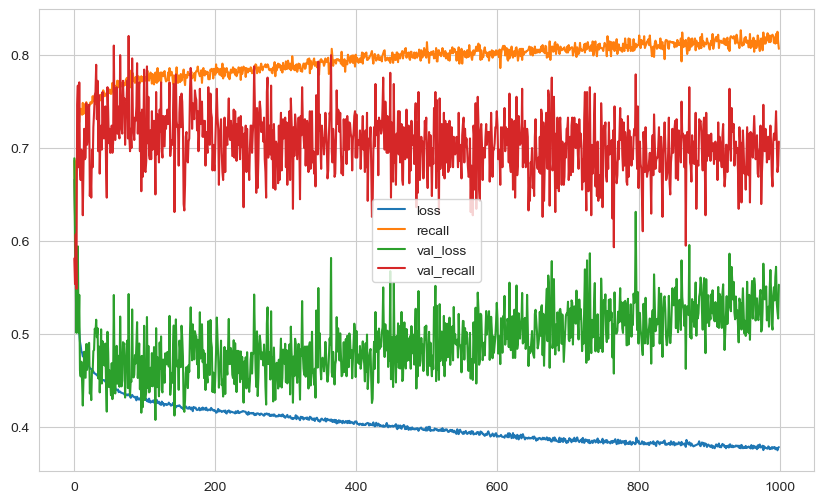

In [48]:
loss_df.plot()
plt.show()

32/32 [==============================] - 0s 1ms/step


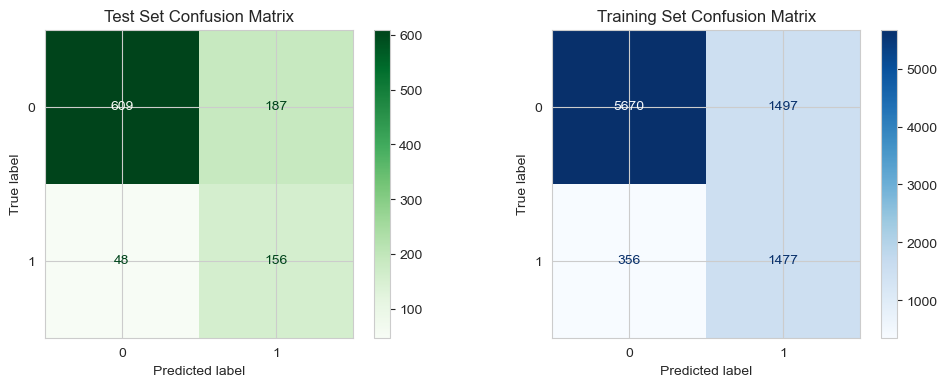


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7167
           1       0.50      0.81      0.61      1833

    accuracy                           0.79      9000
   macro avg       0.72      0.80      0.74      9000
weighted avg       0.85      0.79      0.81      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.45      0.76      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.77      0.78      1000


-----------------------------precision_recall_curve-----------------------------


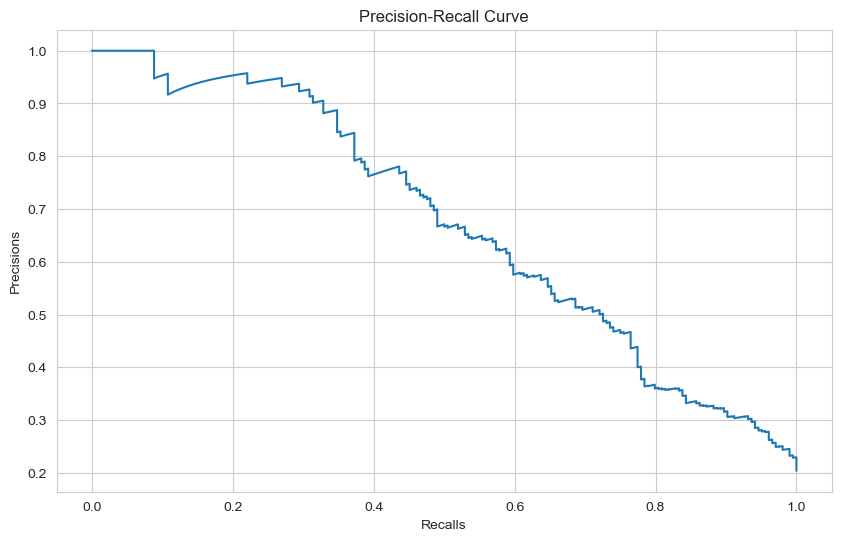

-----------------------------Receiver Operating Characteristic-----------------------------


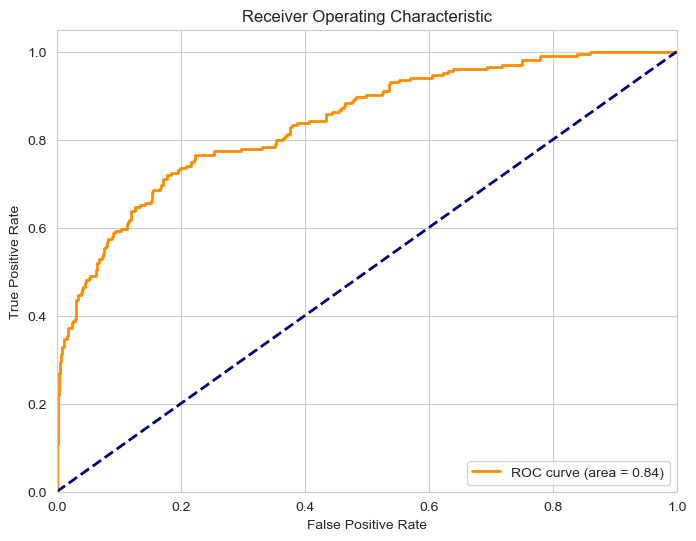

In [49]:
evaluate_classification_model(model2, X_train, y_train, X_test, y_test)

performs better on both training and test data, with higher precision, recall, and F1-scores for both classes. The model has become more robust and less prone to overfitting, resulting in better generalization to new data. The accuracy has also improved.

 no overfiting and will se if there are better result

In [50]:
model2.evaluate(X_test, y_test, verbose=0)

[0.4949456751346588, 0.7647058963775635]

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

in each model contain Evaluate

### Increase The Learning Rate and Observe The Results

In [51]:

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [52]:

model3 = Sequential(
    [
        Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)
optimizer = Adam(learning_rate=0.01)# the defult is 0,001 or adam
# Compile the model
model3.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['Recall'])

In [53]:
# Train your model with the increased learning rate
# Train your model with class weights
model3.fit(X_train, y_train,validation_split=0.3, epochs=1000, batch_size=25, verbose=1, class_weight=class_weight)

Epoch 1/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.6353 - recall: 0.5938 - val_loss: 0.6313 - val_recall: 0.7362
Epoch 2/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5851 - recall: 0.7231 - val_loss: 0.5923 - val_recall: 0.7586
Epoch 3/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5340 - recall: 0.7350 - val_loss: 0.4358 - val_recall: 0.6741
Epoch 4/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.5013 - recall: 0.7279 - val_loss: 0.4594 - val_recall: 0.7138
Epoch 5/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4893 - recall: 0.7510 - val_loss: 0.4753 - val_recall: 0.6466
Epoch 6/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4836 - recall: 0.7406 - val_loss: 0.4476 - val_recall: 0.6707
Epoch 7/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4772 - recall: 0.7183 - val_loss: 0.4042 - val_recall: 0.6121
Epoch 8/1000
252/252

252/252 [==============================] - 1s 2ms/step - loss: 0.4366 - recall: 0.7694 - val_loss: 0.4541 - val_recall: 0.6724
Epoch 60/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4374 - recall: 0.7478 - val_loss: 0.4897 - val_recall: 0.7276
Epoch 61/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4431 - recall: 0.7478 - val_loss: 0.4587 - val_recall: 0.6931
Epoch 62/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4386 - recall: 0.7542 - val_loss: 0.5148 - val_recall: 0.7655
Epoch 63/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4371 - recall: 0.7510 - val_loss: 0.4798 - val_recall: 0.7190
Epoch 64/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4371 - recall: 0.7510 - val_loss: 0.4805 - val_recall: 0.7345
Epoch 65/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4349 - recall: 0.7670 - val_loss: 0.4517 - val_recall: 0.6948
Epoch 66/1000
252/252 [====

252/252 [==============================] - 0s 2ms/step - loss: 0.4291 - recall: 0.7709 - val_loss: 0.4506 - val_recall: 0.6845
Epoch 118/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4268 - recall: 0.7821 - val_loss: 0.4655 - val_recall: 0.6655
Epoch 119/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4248 - recall: 0.7630 - val_loss: 0.4405 - val_recall: 0.6500
Epoch 120/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4247 - recall: 0.7606 - val_loss: 0.4839 - val_recall: 0.7121
Epoch 121/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.7781 - val_loss: 0.4979 - val_recall: 0.6845
Epoch 122/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4215 - recall: 0.7486 - val_loss: 0.4762 - val_recall: 0.7121
Epoch 123/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4269 - recall: 0.7686 - val_loss: 0.4328 - val_recall: 0.6310
Epoch 124/1000
252/25

Epoch 175/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4193 - recall: 0.7462 - val_loss: 0.4950 - val_recall: 0.6914
Epoch 176/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4184 - recall: 0.7678 - val_loss: 0.4707 - val_recall: 0.6845
Epoch 177/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4184 - recall: 0.7654 - val_loss: 0.4646 - val_recall: 0.6759
Epoch 178/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4162 - recall: 0.7622 - val_loss: 0.4727 - val_recall: 0.6931
Epoch 179/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4185 - recall: 0.7550 - val_loss: 0.5227 - val_recall: 0.7483
Epoch 180/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4152 - recall: 0.7725 - val_loss: 0.4477 - val_recall: 0.6500
Epoch 181/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4162 - recall: 0.7709 - val_loss: 0.4726 - val_recall: 0.6897
Epoch 

Epoch 233/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4153 - recall: 0.7805 - val_loss: 0.4754 - val_recall: 0.6862
Epoch 234/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4158 - recall: 0.7574 - val_loss: 0.4880 - val_recall: 0.6914
Epoch 235/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4152 - recall: 0.7630 - val_loss: 0.4915 - val_recall: 0.6828
Epoch 236/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4180 - recall: 0.7733 - val_loss: 0.5120 - val_recall: 0.7017
Epoch 237/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4177 - recall: 0.7686 - val_loss: 0.4963 - val_recall: 0.7138
Epoch 238/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4181 - recall: 0.7478 - val_loss: 0.5327 - val_recall: 0.7638
Epoch 239/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4136 - recall: 0.7741 - val_loss: 0.4874 - val_recall: 0.7034
Epoch 

Epoch 291/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4084 - recall: 0.7717 - val_loss: 0.5305 - val_recall: 0.7397
Epoch 292/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4065 - recall: 0.7845 - val_loss: 0.4867 - val_recall: 0.7103
Epoch 293/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4088 - recall: 0.7797 - val_loss: 0.4977 - val_recall: 0.7034
Epoch 294/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4119 - recall: 0.7638 - val_loss: 0.5304 - val_recall: 0.7414
Epoch 295/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4107 - recall: 0.7717 - val_loss: 0.5434 - val_recall: 0.7448
Epoch 296/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4132 - recall: 0.7853 - val_loss: 0.4950 - val_recall: 0.7207
Epoch 297/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4089 - recall: 0.7781 - val_loss: 0.5098 - val_recall: 0.7086
Epoch 

Epoch 349/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4048 - recall: 0.7813 - val_loss: 0.5439 - val_recall: 0.7517
Epoch 350/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4084 - recall: 0.7789 - val_loss: 0.5138 - val_recall: 0.7345
Epoch 351/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4048 - recall: 0.7861 - val_loss: 0.5059 - val_recall: 0.7103
Epoch 352/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4070 - recall: 0.7917 - val_loss: 0.5105 - val_recall: 0.6983
Epoch 353/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4093 - recall: 0.7749 - val_loss: 0.5029 - val_recall: 0.7345
Epoch 354/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4059 - recall: 0.7941 - val_loss: 0.5145 - val_recall: 0.7069
Epoch 355/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4192 - recall: 0.7757 - val_loss: 0.4903 - val_recall: 0.6897
Epoch 

Epoch 407/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4050 - recall: 0.7869 - val_loss: 0.5818 - val_recall: 0.7724
Epoch 408/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4074 - recall: 0.7813 - val_loss: 0.6066 - val_recall: 0.7586
Epoch 409/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4115 - recall: 0.7877 - val_loss: 0.5257 - val_recall: 0.6810
Epoch 410/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4114 - recall: 0.7741 - val_loss: 0.5204 - val_recall: 0.7293
Epoch 411/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4148 - recall: 0.7853 - val_loss: 0.5047 - val_recall: 0.6983
Epoch 412/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4032 - recall: 0.7781 - val_loss: 0.5142 - val_recall: 0.6828
Epoch 413/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4033 - recall: 0.7725 - val_loss: 0.6207 - val_recall: 0.7517
Epoch 

Epoch 465/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4035 - recall: 0.7965 - val_loss: 0.5441 - val_recall: 0.7362
Epoch 466/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4077 - recall: 0.7981 - val_loss: 0.5317 - val_recall: 0.7034
Epoch 467/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4040 - recall: 0.7789 - val_loss: 0.5367 - val_recall: 0.6810
Epoch 468/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4018 - recall: 0.7965 - val_loss: 0.5282 - val_recall: 0.7259
Epoch 469/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4094 - recall: 0.7805 - val_loss: 0.5497 - val_recall: 0.7052
Epoch 470/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4085 - recall: 0.7845 - val_loss: 0.4670 - val_recall: 0.6431
Epoch 471/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4072 - recall: 0.7861 - val_loss: 0.5559 - val_recall: 0.7517
Epoch 

Epoch 523/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4035 - recall: 0.7925 - val_loss: 0.5552 - val_recall: 0.6862
Epoch 524/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4029 - recall: 0.7837 - val_loss: 0.5614 - val_recall: 0.7362
Epoch 525/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4042 - recall: 0.8021 - val_loss: 0.5211 - val_recall: 0.7362
Epoch 526/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4020 - recall: 0.7789 - val_loss: 0.5914 - val_recall: 0.7534
Epoch 527/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4049 - recall: 0.7949 - val_loss: 0.5095 - val_recall: 0.7034
Epoch 528/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4103 - recall: 0.7981 - val_loss: 0.5378 - val_recall: 0.7103
Epoch 529/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4049 - recall: 0.7957 - val_loss: 0.5396 - val_recall: 0.7259
Epoch 

Epoch 581/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4047 - recall: 0.7981 - val_loss: 0.4835 - val_recall: 0.6414
Epoch 582/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4145 - recall: 0.7773 - val_loss: 0.5198 - val_recall: 0.6828
Epoch 583/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4024 - recall: 0.7853 - val_loss: 0.5461 - val_recall: 0.7121
Epoch 584/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3993 - recall: 0.7901 - val_loss: 0.5878 - val_recall: 0.7276
Epoch 585/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4011 - recall: 0.7957 - val_loss: 0.5689 - val_recall: 0.6983
Epoch 586/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4033 - recall: 0.7933 - val_loss: 0.5215 - val_recall: 0.7052
Epoch 587/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4052 - recall: 0.7837 - val_loss: 0.5534 - val_recall: 0.6897
Epoch 

Epoch 639/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4051 - recall: 0.7829 - val_loss: 0.5788 - val_recall: 0.7517
Epoch 640/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4003 - recall: 0.7909 - val_loss: 0.5458 - val_recall: 0.6828
Epoch 641/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3995 - recall: 0.7877 - val_loss: 0.5627 - val_recall: 0.6914
Epoch 642/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4069 - recall: 0.7981 - val_loss: 0.5373 - val_recall: 0.6983
Epoch 643/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3974 - recall: 0.7981 - val_loss: 0.5747 - val_recall: 0.7103
Epoch 644/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3992 - recall: 0.7989 - val_loss: 0.5420 - val_recall: 0.6897
Epoch 645/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4005 - recall: 0.8061 - val_loss: 0.5979 - val_recall: 0.7431
Epoch 

Epoch 697/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3975 - recall: 0.8053 - val_loss: 0.5356 - val_recall: 0.7224
Epoch 698/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3921 - recall: 0.8109 - val_loss: 0.5938 - val_recall: 0.7034
Epoch 699/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4006 - recall: 0.8101 - val_loss: 0.5290 - val_recall: 0.6810
Epoch 700/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4090 - recall: 0.8013 - val_loss: 0.5638 - val_recall: 0.7431
Epoch 701/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4110 - recall: 0.8045 - val_loss: 0.5217 - val_recall: 0.6690
Epoch 702/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3978 - recall: 0.7989 - val_loss: 0.5459 - val_recall: 0.6759
Epoch 703/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4092 - recall: 0.7861 - val_loss: 0.5048 - val_recall: 0.6948
Epoch 

Epoch 755/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4025 - recall: 0.8109 - val_loss: 0.5877 - val_recall: 0.7328
Epoch 756/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3957 - recall: 0.8196 - val_loss: 0.5837 - val_recall: 0.7190
Epoch 757/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3997 - recall: 0.8029 - val_loss: 0.5432 - val_recall: 0.7121
Epoch 758/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4018 - recall: 0.7877 - val_loss: 0.5493 - val_recall: 0.6862
Epoch 759/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3943 - recall: 0.8125 - val_loss: 0.6195 - val_recall: 0.7414
Epoch 760/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3972 - recall: 0.8252 - val_loss: 0.5842 - val_recall: 0.7517
Epoch 761/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3970 - recall: 0.8172 - val_loss: 0.6185 - val_recall: 0.7448
Epoch 

Epoch 813/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4020 - recall: 0.8220 - val_loss: 0.5589 - val_recall: 0.7190
Epoch 814/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4028 - recall: 0.8021 - val_loss: 0.5518 - val_recall: 0.7069
Epoch 815/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3992 - recall: 0.8013 - val_loss: 0.5632 - val_recall: 0.7103
Epoch 816/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3959 - recall: 0.8053 - val_loss: 0.5551 - val_recall: 0.6931
Epoch 817/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3888 - recall: 0.8061 - val_loss: 0.6282 - val_recall: 0.7672
Epoch 818/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3938 - recall: 0.8340 - val_loss: 0.6482 - val_recall: 0.7466
Epoch 819/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3941 - recall: 0.8252 - val_loss: 0.5951 - val_recall: 0.7397
Epoch 

Epoch 871/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3984 - recall: 0.8228 - val_loss: 0.5779 - val_recall: 0.7276
Epoch 872/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3965 - recall: 0.8132 - val_loss: 0.5589 - val_recall: 0.7052
Epoch 873/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3906 - recall: 0.8140 - val_loss: 0.5990 - val_recall: 0.7414
Epoch 874/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4031 - recall: 0.8180 - val_loss: 0.5798 - val_recall: 0.7466
Epoch 875/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3939 - recall: 0.8228 - val_loss: 0.5803 - val_recall: 0.7310
Epoch 876/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3980 - recall: 0.8180 - val_loss: 0.5775 - val_recall: 0.7276
Epoch 877/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3980 - recall: 0.8252 - val_loss: 0.5399 - val_recall: 0.7138
Epoch 

Epoch 929/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3965 - recall: 0.8340 - val_loss: 0.5328 - val_recall: 0.7052
Epoch 930/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3975 - recall: 0.8180 - val_loss: 0.5543 - val_recall: 0.7328
Epoch 931/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3987 - recall: 0.8085 - val_loss: 0.5806 - val_recall: 0.7241
Epoch 932/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3938 - recall: 0.8324 - val_loss: 0.6063 - val_recall: 0.7638
Epoch 933/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.3960 - recall: 0.8260 - val_loss: 0.5298 - val_recall: 0.7172
Epoch 934/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3991 - recall: 0.8300 - val_loss: 0.5879 - val_recall: 0.7638
Epoch 935/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4082 - recall: 0.8029 - val_loss: 0.5869 - val_recall: 0.7103
Epoch 

Epoch 987/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3911 - recall: 0.8244 - val_loss: 0.6010 - val_recall: 0.7259
Epoch 988/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4010 - recall: 0.8204 - val_loss: 0.5693 - val_recall: 0.7276
Epoch 989/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3915 - recall: 0.8164 - val_loss: 0.5837 - val_recall: 0.7103
Epoch 990/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4027 - recall: 0.8300 - val_loss: 0.5318 - val_recall: 0.7224
Epoch 991/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.3950 - recall: 0.8252 - val_loss: 0.5702 - val_recall: 0.6931
Epoch 992/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3930 - recall: 0.8236 - val_loss: 0.6067 - val_recall: 0.7741
Epoch 993/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.3950 - recall: 0.8348 - val_loss: 0.5730 - val_recall: 0.7483
Epoch 

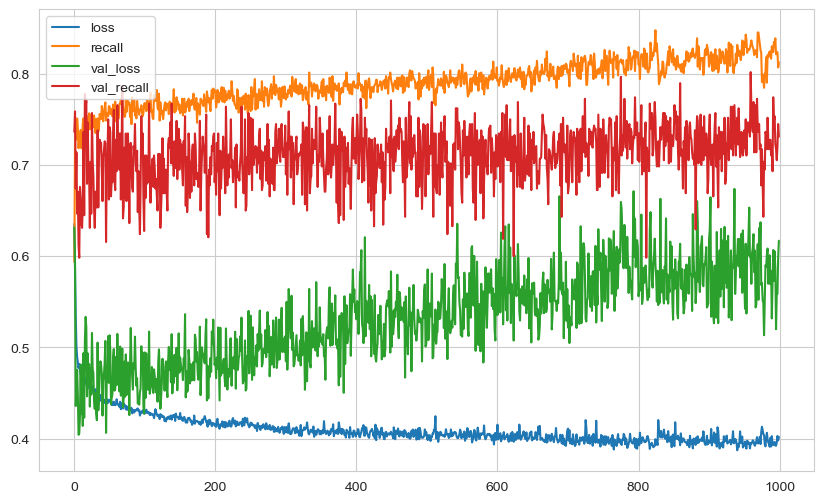

In [54]:
# Plot model history
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot()
plt.show()

In [55]:
# Make predictions on the test data
y_pred = model3.predict(X_test) > 0.5

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

32/32 [==============================] - 0s 1ms/step
Confusion Matrix:
[[608 188]
 [ 41 163]]


In [56]:
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)

32/32 [==============================] - 0s 1ms/step


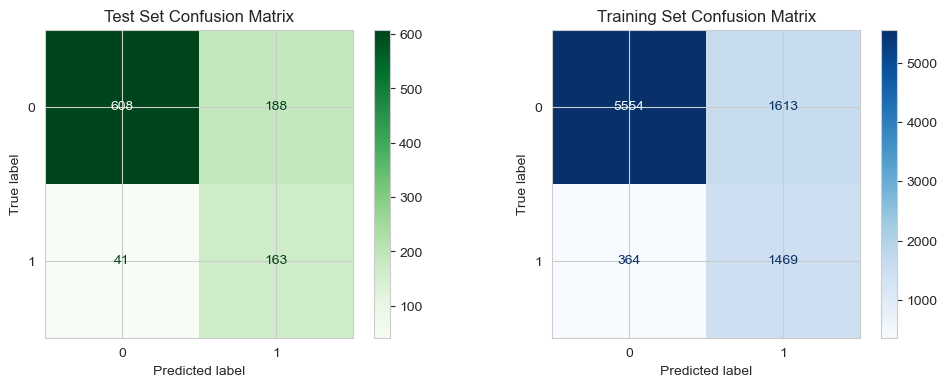


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7167
           1       0.48      0.80      0.60      1833

    accuracy                           0.78      9000
   macro avg       0.71      0.79      0.72      9000
weighted avg       0.84      0.78      0.80      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       796
           1       0.46      0.80      0.59       204

    accuracy                           0.77      1000
   macro avg       0.70      0.78      0.71      1000
weighted avg       0.84      0.77      0.79      1000


-----------------------------precision_recall_curve-----------------------------


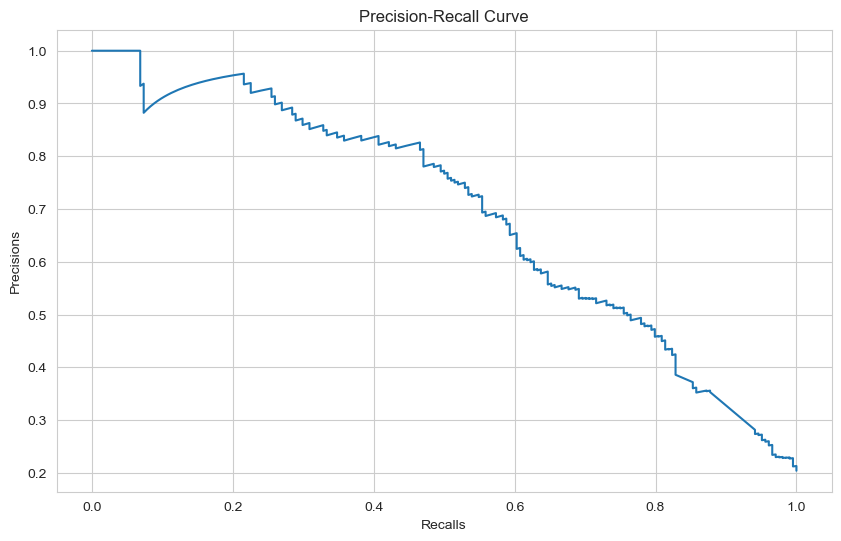

-----------------------------Receiver Operating Characteristic-----------------------------


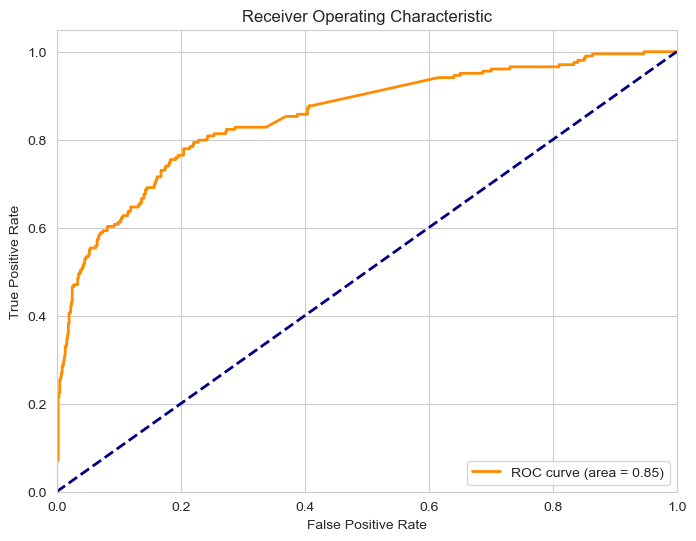

In [57]:
evaluate_classification_model(model3, X_train, y_train, X_test, y_test)

The model's performance on the training and test data is relatively balanced, with both having similar accuracy and F1-scores.
While there is a difference in precision and recall between class 0 and class 1, it doesn't necessarily indicate overfitting. It could be related to the model's ability to distinguish between the two classes.

### Add Dropout Layer

In [58]:
model4 = Sequential(
    [
        Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.2),  # Dropout layer after the first dense layer
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dropout(0.2),  # Dropout layer after the second dense layer
        Dense(units=1, activation='sigmoid')
    ]
)

optimizer = Adam(learning_rate=0.01)

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

# Assuming you have already defined X_train, y_train, class_weight, and imported necessary libraries
model4.fit(X_train, y_train,  validation_split=0.3, epochs=1000, batch_size=25, verbose=1, class_weight=class_weight)

Epoch 1/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.6721 - recall: 0.5219 - val_loss: 0.6000 - val_recall: 0.4414
Epoch 2/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.6436 - recall: 0.7191 - val_loss: 0.5900 - val_recall: 0.6948
Epoch 3/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.6248 - recall: 0.7326 - val_loss: 0.6076 - val_recall: 0.7931
Epoch 4/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.6078 - recall: 0.7207 - val_loss: 0.6008 - val_recall: 0.7431
Epoch 5/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.6038 - recall: 0.7143 - val_loss: 0.4982 - val_recall: 0.5879
Epoch 6/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.5942 - recall: 0.7063 - val_loss: 0.6448 - val_recall: 0.8690
Epoch 7/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.5832 - recall: 0.7390 - val_loss: 0.4737 - val_recall: 0.5793
Epoch 8/1000
252/252

252/252 [==============================] - 0s 2ms/step - loss: 0.4931 - recall: 0.7430 - val_loss: 0.5019 - val_recall: 0.7638
Epoch 60/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4958 - recall: 0.7271 - val_loss: 0.5422 - val_recall: 0.7879
Epoch 61/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4920 - recall: 0.6935 - val_loss: 0.4867 - val_recall: 0.7000
Epoch 62/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4959 - recall: 0.7191 - val_loss: 0.4334 - val_recall: 0.6707
Epoch 63/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4866 - recall: 0.7414 - val_loss: 0.4627 - val_recall: 0.6983
Epoch 64/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4997 - recall: 0.7255 - val_loss: 0.4840 - val_recall: 0.6966
Epoch 65/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4916 - recall: 0.7191 - val_loss: 0.4656 - val_recall: 0.7121
Epoch 66/1000
252/252 [====

252/252 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.7007 - val_loss: 0.5487 - val_recall: 0.7500
Epoch 118/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4827 - recall: 0.7350 - val_loss: 0.4727 - val_recall: 0.7379
Epoch 119/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4881 - recall: 0.7326 - val_loss: 0.5109 - val_recall: 0.7328
Epoch 120/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4841 - recall: 0.7159 - val_loss: 0.4919 - val_recall: 0.7207
Epoch 121/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4835 - recall: 0.7127 - val_loss: 0.4569 - val_recall: 0.7207
Epoch 122/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4839 - recall: 0.7215 - val_loss: 0.4836 - val_recall: 0.7397
Epoch 123/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4949 - recall: 0.7302 - val_loss: 0.4711 - val_recall: 0.7086
Epoch 124/1000
252/25

Epoch 175/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4855 - recall: 0.7414 - val_loss: 0.4887 - val_recall: 0.7172
Epoch 176/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4845 - recall: 0.7510 - val_loss: 0.5226 - val_recall: 0.7414
Epoch 177/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4846 - recall: 0.7111 - val_loss: 0.4976 - val_recall: 0.7155
Epoch 178/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4855 - recall: 0.7342 - val_loss: 0.4444 - val_recall: 0.7103
Epoch 179/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4859 - recall: 0.7350 - val_loss: 0.5180 - val_recall: 0.7638
Epoch 180/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4792 - recall: 0.7446 - val_loss: 0.4980 - val_recall: 0.7379
Epoch 181/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4771 - recall: 0.7318 - val_loss: 0.4566 - val_recall: 0.7310
Epoch 

Epoch 233/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4816 - recall: 0.7167 - val_loss: 0.4762 - val_recall: 0.7241
Epoch 234/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4738 - recall: 0.7382 - val_loss: 0.4583 - val_recall: 0.7276
Epoch 235/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4847 - recall: 0.7287 - val_loss: 0.4639 - val_recall: 0.7000
Epoch 236/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4846 - recall: 0.7223 - val_loss: 0.4598 - val_recall: 0.7103
Epoch 237/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4790 - recall: 0.7326 - val_loss: 0.4509 - val_recall: 0.6966
Epoch 238/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4728 - recall: 0.7159 - val_loss: 0.4738 - val_recall: 0.7224
Epoch 239/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4830 - recall: 0.7534 - val_loss: 0.4872 - val_recall: 0.7603
Epoch 

Epoch 291/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4833 - recall: 0.7478 - val_loss: 0.4523 - val_recall: 0.7034
Epoch 292/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4826 - recall: 0.7406 - val_loss: 0.4494 - val_recall: 0.7138
Epoch 293/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4853 - recall: 0.7406 - val_loss: 0.4838 - val_recall: 0.7672
Epoch 294/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4808 - recall: 0.7271 - val_loss: 0.4948 - val_recall: 0.7276
Epoch 295/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4817 - recall: 0.7358 - val_loss: 0.4689 - val_recall: 0.7138
Epoch 296/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4749 - recall: 0.7294 - val_loss: 0.4742 - val_recall: 0.7190
Epoch 297/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4745 - recall: 0.7534 - val_loss: 0.4699 - val_recall: 0.7017
Epoch 

Epoch 349/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4803 - recall: 0.7255 - val_loss: 0.4231 - val_recall: 0.7017
Epoch 350/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4811 - recall: 0.7023 - val_loss: 0.5122 - val_recall: 0.7862
Epoch 351/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4724 - recall: 0.7255 - val_loss: 0.4410 - val_recall: 0.7328
Epoch 352/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4786 - recall: 0.6872 - val_loss: 0.4628 - val_recall: 0.7086
Epoch 353/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4707 - recall: 0.6879 - val_loss: 0.4463 - val_recall: 0.7207
Epoch 354/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4795 - recall: 0.7119 - val_loss: 0.4644 - val_recall: 0.7190
Epoch 355/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4754 - recall: 0.7366 - val_loss: 0.4603 - val_recall: 0.7224
Epoch 

Epoch 407/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4812 - recall: 0.7287 - val_loss: 0.4740 - val_recall: 0.7707
Epoch 408/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4785 - recall: 0.7550 - val_loss: 0.4344 - val_recall: 0.7052
Epoch 409/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4813 - recall: 0.7398 - val_loss: 0.5289 - val_recall: 0.8103
Epoch 410/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4817 - recall: 0.7223 - val_loss: 0.4879 - val_recall: 0.7552
Epoch 411/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4781 - recall: 0.7350 - val_loss: 0.4821 - val_recall: 0.7862
Epoch 412/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4705 - recall: 0.7773 - val_loss: 0.4603 - val_recall: 0.7224
Epoch 413/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4816 - recall: 0.7446 - val_loss: 0.4577 - val_recall: 0.6897
Epoch 

Epoch 465/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4819 - recall: 0.7398 - val_loss: 0.4777 - val_recall: 0.7793
Epoch 466/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4782 - recall: 0.7462 - val_loss: 0.4938 - val_recall: 0.7172
Epoch 467/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4717 - recall: 0.7039 - val_loss: 0.5360 - val_recall: 0.8155
Epoch 468/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4781 - recall: 0.7590 - val_loss: 0.4780 - val_recall: 0.7241
Epoch 469/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4756 - recall: 0.7111 - val_loss: 0.5080 - val_recall: 0.7983
Epoch 470/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4772 - recall: 0.7422 - val_loss: 0.4896 - val_recall: 0.7569
Epoch 471/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4826 - recall: 0.7478 - val_loss: 0.4759 - val_recall: 0.7155
Epoch 

Epoch 523/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4708 - recall: 0.7406 - val_loss: 0.5002 - val_recall: 0.7621
Epoch 524/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4773 - recall: 0.7502 - val_loss: 0.4806 - val_recall: 0.7862
Epoch 525/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4780 - recall: 0.7574 - val_loss: 0.4748 - val_recall: 0.7328
Epoch 526/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4767 - recall: 0.7725 - val_loss: 0.4396 - val_recall: 0.7017
Epoch 527/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4738 - recall: 0.7454 - val_loss: 0.4569 - val_recall: 0.7328
Epoch 528/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4730 - recall: 0.7542 - val_loss: 0.4733 - val_recall: 0.6914
Epoch 529/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4763 - recall: 0.7438 - val_loss: 0.5033 - val_recall: 0.7828
Epoch 

Epoch 581/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4756 - recall: 0.7326 - val_loss: 0.4869 - val_recall: 0.7103
Epoch 582/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4803 - recall: 0.7071 - val_loss: 0.4467 - val_recall: 0.6914
Epoch 583/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4845 - recall: 0.7406 - val_loss: 0.4608 - val_recall: 0.6690
Epoch 584/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4772 - recall: 0.7470 - val_loss: 0.4661 - val_recall: 0.7707
Epoch 585/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4691 - recall: 0.7709 - val_loss: 0.4851 - val_recall: 0.7448
Epoch 586/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4756 - recall: 0.7574 - val_loss: 0.4853 - val_recall: 0.7845
Epoch 587/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4776 - recall: 0.7358 - val_loss: 0.4542 - val_recall: 0.7121
Epoch 

Epoch 639/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4755 - recall: 0.7622 - val_loss: 0.4542 - val_recall: 0.7069
Epoch 640/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4779 - recall: 0.7606 - val_loss: 0.4658 - val_recall: 0.6879
Epoch 641/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4738 - recall: 0.7342 - val_loss: 0.5132 - val_recall: 0.7828
Epoch 642/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4719 - recall: 0.7279 - val_loss: 0.4806 - val_recall: 0.7259
Epoch 643/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4790 - recall: 0.7350 - val_loss: 0.4475 - val_recall: 0.7138
Epoch 644/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4712 - recall: 0.7302 - val_loss: 0.4886 - val_recall: 0.7879
Epoch 645/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4745 - recall: 0.7518 - val_loss: 0.4891 - val_recall: 0.7293
Epoch 

Epoch 697/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4712 - recall: 0.7199 - val_loss: 0.5108 - val_recall: 0.7914
Epoch 698/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4845 - recall: 0.7007 - val_loss: 0.5097 - val_recall: 0.7828
Epoch 699/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4777 - recall: 0.7382 - val_loss: 0.4888 - val_recall: 0.7328
Epoch 700/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4779 - recall: 0.7486 - val_loss: 0.4622 - val_recall: 0.7069
Epoch 701/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4760 - recall: 0.7358 - val_loss: 0.4837 - val_recall: 0.7276
Epoch 702/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4717 - recall: 0.7310 - val_loss: 0.4721 - val_recall: 0.7155
Epoch 703/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4774 - recall: 0.7510 - val_loss: 0.4562 - val_recall: 0.7017
Epoch 

Epoch 755/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4808 - recall: 0.7342 - val_loss: 0.4675 - val_recall: 0.7034
Epoch 756/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4723 - recall: 0.7526 - val_loss: 0.5024 - val_recall: 0.7793
Epoch 757/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4781 - recall: 0.7654 - val_loss: 0.4653 - val_recall: 0.7121
Epoch 758/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4740 - recall: 0.7526 - val_loss: 0.5044 - val_recall: 0.7552
Epoch 759/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4735 - recall: 0.7414 - val_loss: 0.4797 - val_recall: 0.7207
Epoch 760/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4801 - recall: 0.6935 - val_loss: 0.4603 - val_recall: 0.6897
Epoch 761/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4796 - recall: 0.7518 - val_loss: 0.4627 - val_recall: 0.7069
Epoch 

Epoch 813/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4756 - recall: 0.7023 - val_loss: 0.4585 - val_recall: 0.7103
Epoch 814/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4787 - recall: 0.7183 - val_loss: 0.5200 - val_recall: 0.7897
Epoch 815/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4824 - recall: 0.7023 - val_loss: 0.4578 - val_recall: 0.7103
Epoch 816/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4735 - recall: 0.7765 - val_loss: 0.4792 - val_recall: 0.7621
Epoch 817/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4738 - recall: 0.7406 - val_loss: 0.4789 - val_recall: 0.7672
Epoch 818/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4668 - recall: 0.7063 - val_loss: 0.4916 - val_recall: 0.7500
Epoch 819/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4725 - recall: 0.6640 - val_loss: 0.5090 - val_recall: 0.7224
Epoch 

Epoch 871/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4728 - recall: 0.7430 - val_loss: 0.5065 - val_recall: 0.7638
Epoch 872/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4748 - recall: 0.7486 - val_loss: 0.4543 - val_recall: 0.7259
Epoch 873/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4705 - recall: 0.7526 - val_loss: 0.4708 - val_recall: 0.7724
Epoch 874/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4777 - recall: 0.7949 - val_loss: 0.4651 - val_recall: 0.7207
Epoch 875/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4753 - recall: 0.7606 - val_loss: 0.4956 - val_recall: 0.8155
Epoch 876/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4767 - recall: 0.7741 - val_loss: 0.5079 - val_recall: 0.7897
Epoch 877/1000
252/252 [==============================] - 0s 1ms/step - loss: 0.4723 - recall: 0.7462 - val_loss: 0.4499 - val_recall: 0.6966
Epoch 

Epoch 929/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4724 - recall: 0.6975 - val_loss: 0.4740 - val_recall: 0.7121
Epoch 930/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4760 - recall: 0.6808 - val_loss: 0.4535 - val_recall: 0.7052
Epoch 931/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4775 - recall: 0.6808 - val_loss: 0.4727 - val_recall: 0.7310
Epoch 932/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4768 - recall: 0.6887 - val_loss: 0.4943 - val_recall: 0.7879
Epoch 933/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4722 - recall: 0.6800 - val_loss: 0.4719 - val_recall: 0.7224
Epoch 934/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4737 - recall: 0.7111 - val_loss: 0.4922 - val_recall: 0.7810
Epoch 935/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4746 - recall: 0.6784 - val_loss: 0.4985 - val_recall: 0.7862
Epoch 

Epoch 987/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4789 - recall: 0.7406 - val_loss: 0.4638 - val_recall: 0.7207
Epoch 988/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4744 - recall: 0.7470 - val_loss: 0.4749 - val_recall: 0.7138
Epoch 989/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4790 - recall: 0.6688 - val_loss: 0.4792 - val_recall: 0.7172
Epoch 990/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4820 - recall: 0.7159 - val_loss: 0.4876 - val_recall: 0.7172
Epoch 991/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4702 - recall: 0.7318 - val_loss: 0.4818 - val_recall: 0.7155
Epoch 992/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4792 - recall: 0.7598 - val_loss: 0.4779 - val_recall: 0.7069
Epoch 993/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4711 - recall: 0.7414 - val_loss: 0.4883 - val_recall: 0.7983
Epoch 

In [59]:
loss_df = pd.DataFrame(model4.history.history)
loss_df


,loss,recall,val_loss,val_recall
0,0.672,0.522,0.600,0.441
1,0.644,0.719,0.590,0.695
2,0.625,0.733,0.608,0.793
3,0.608,0.721,0.601,0.743
4,0.604,0.714,0.498,0.588
...,...,...,...,...
995,0.480,0.680,0.517,0.709
996,0.468,0.726,0.460,0.736
997,0.473,0.720,0.510,0.745
998,0.470,0.711,0.443,0.695


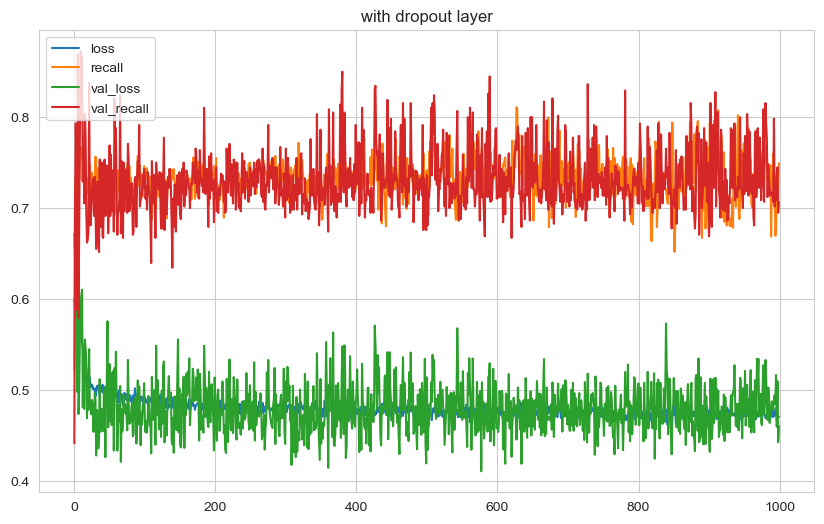

In [60]:
loss_df.plot()
plt.title('with dropout layer');

In [61]:
# Evaluate the model
loss_dropout, accuracy_dropout = model4.evaluate(X_test, y_test, verbose=0)
print("Loss (Dropout Layer):", loss_dropout)
print("Accuracy (Dropout Layer):", accuracy_dropout)

Loss (Dropout Layer): 0.44811582565307617
Accuracy (Dropout Layer): 0.7450980544090271


32/32 [==============================] - 0s 774us/step


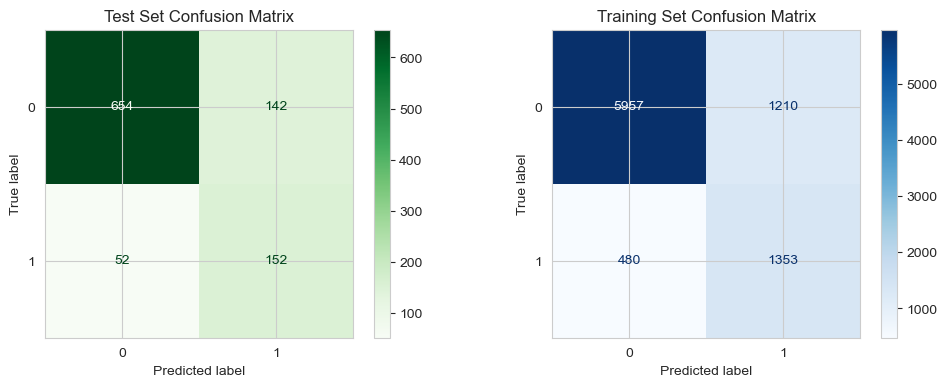


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7167
           1       0.53      0.74      0.62      1833

    accuracy                           0.81      9000
   macro avg       0.73      0.78      0.75      9000
weighted avg       0.84      0.81      0.82      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       796
           1       0.52      0.75      0.61       204

    accuracy                           0.81      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.81      0.82      1000


-----------------------------precision_recall_curve-----------------------------


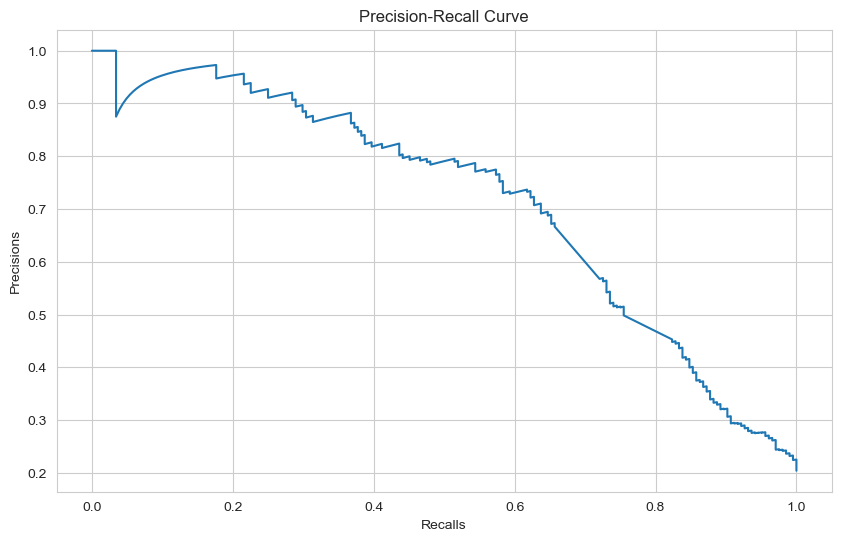

-----------------------------Receiver Operating Characteristic-----------------------------


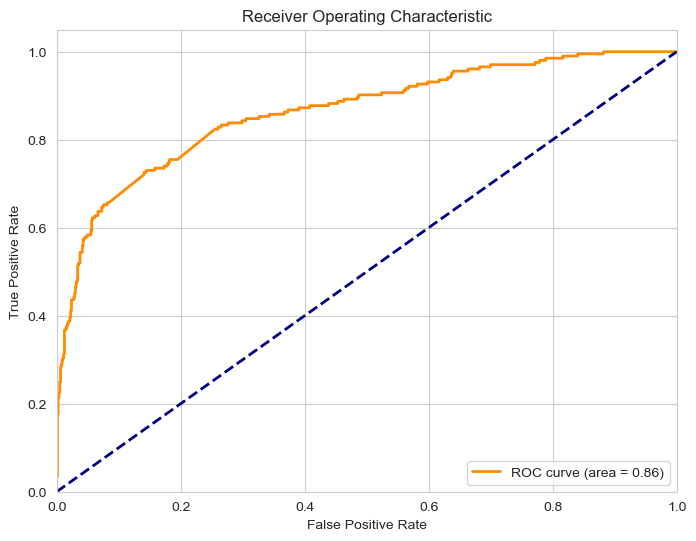

In [62]:
evaluate_classification_model(model4, X_train, y_train, X_test, y_test)

Train Results:

The model's performance on the training data is reasonably balanced, with relatively high precision, recall, and F1-scores for both class 0 (the negative class) and class 1 (the positive class).
The accuracy for the training data is 81%, indicating good overall model performance on the training set.

Test Results:

The model's performance on the test data is also reasonably balanced, with respectable precision, recall, and F1-scores for both class 0 and class 1.
The accuracy for the test data is 81%, showing that the model performs well on unseen data.
These results suggest that the model is capable of making reasonably accurate predictions for both class 0 and class 1. There is no strong indication of overfitting, as the performance on the training and test data is consistent. Overall, the model appears to be performing well on this classification task.

### Add Early Stop

In [63]:

model5= Sequential(
    [

        Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

optimizer = Adam(learning_rate=0.01)

# Compile the model
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

early_stop = EarlyStopping(
    monitor='val_loss', mode='min',  # minimize the loss
    verbose=1, patience=25, restore_best_weights=True
)

model5.fit(
    x=X_train,
    y=y_train,
    validation_split=0.3,
    batch_size=25,
    epochs=1000,
    class_weight=class_weight,
    callbacks=[early_stop]
)


Epoch 1/1000
252/252 [==============================] - 2s 4ms/step - loss: 0.6198 - recall: 0.6433 - val_loss: 0.5866 - val_recall: 0.6397
Epoch 2/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.5772 - recall: 0.6951 - val_loss: 0.5010 - val_recall: 0.6672
Epoch 3/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.5190 - recall: 0.7287 - val_loss: 0.4766 - val_recall: 0.7052
Epoch 4/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4928 - recall: 0.7374 - val_loss: 0.4812 - val_recall: 0.6897
Epoch 5/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4824 - recall: 0.7438 - val_loss: 0.5017 - val_recall: 0.7948
Epoch 6/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4817 - recall: 0.7191 - val_loss: 0.4911 - val_recall: 0.7310
Epoch 7/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4776 - recall: 0.7207 - val_loss: 0.4373 - val_recall: 0.6845
Epoch 8/1000
252/252

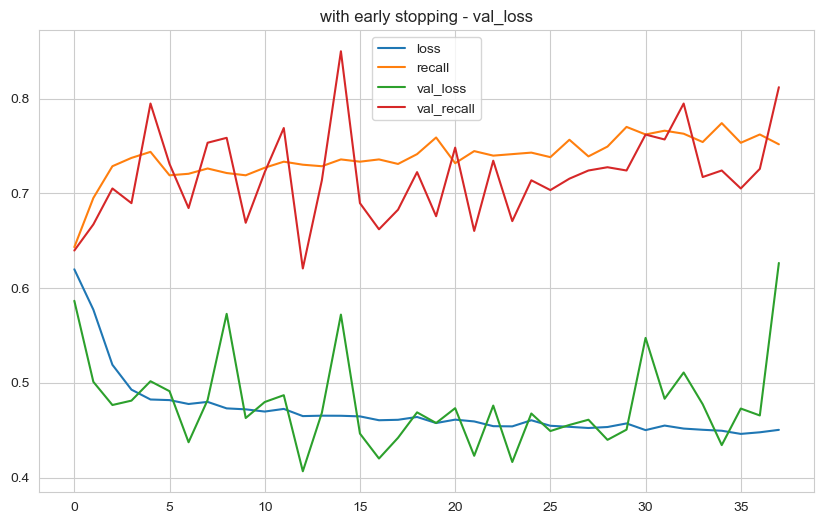

In [64]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.plot()
plt.title('with early stopping - val_loss');

In [65]:
loss_early_stop, accuracy_early_stop = model5.evaluate(X_test, y_test, verbose=0)
print("Loss (early_stopping):", loss_early_stop)
print("Accuracy (early_stopping):", accuracy_early_stop)

Loss (early_stopping): 0.38752248883247375
Accuracy (early_stopping): 0.6960784196853638


32/32 [==============================] - 0s 595us/step


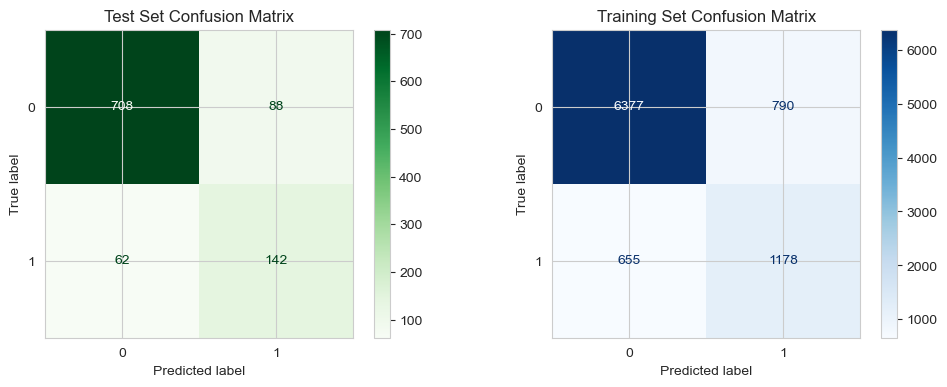


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7167
           1       0.60      0.64      0.62      1833

    accuracy                           0.84      9000
   macro avg       0.75      0.77      0.76      9000
weighted avg       0.84      0.84      0.84      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       796
           1       0.62      0.70      0.65       204

    accuracy                           0.85      1000
   macro avg       0.77      0.79      0.78      1000
weighted avg       0.86      0.85      0.85      1000


-----------------------------precision_recall_curve-----------------------------


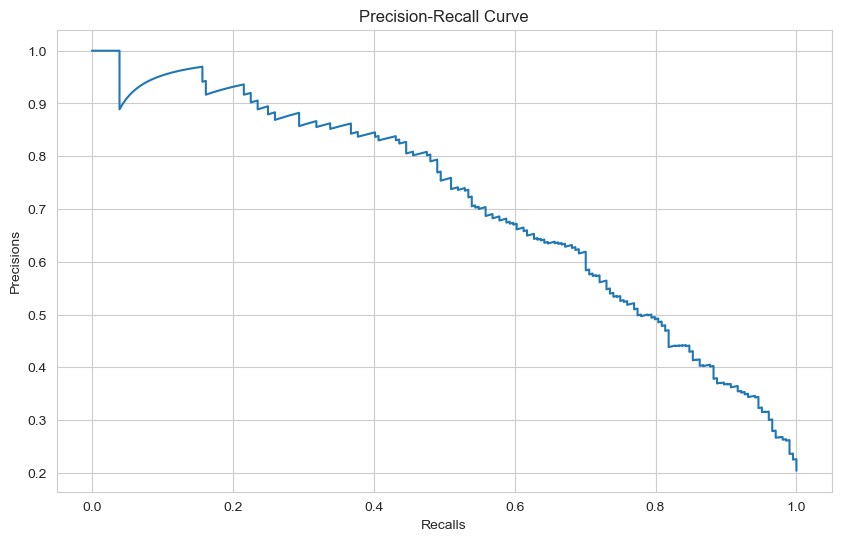

-----------------------------Receiver Operating Characteristic-----------------------------


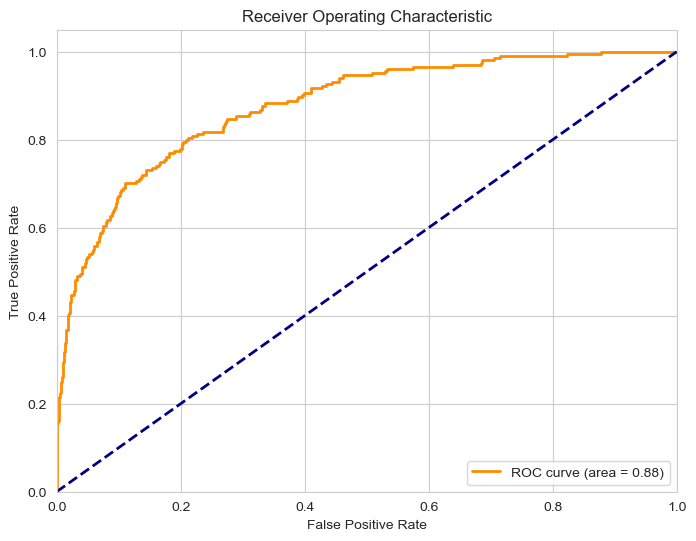

In [66]:
evaluate_classification_model(model5, X_train, y_train, X_test, y_test)

 the model exhibits a good balance of precision, recall, and F1-scores for both class 0 (the negative class) and class 1 (the positive class) in both the training and test data. The accuracy for both datasets is also favorable. These results suggest that the model is performing well on this classification task, with a reasonable ability to predict both negative and positive instances.

#### Monitor the "val_loss" as metric

In [67]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming you've already imported necessary libraries and set your random seed using set_seed()

model6 = Sequential(
    [
         Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

optimizer = Adam(learning_rate=0.01)

# Compile the model
model6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    mode='min',          # Minimize the loss
    verbose=1,           # Display messages
    patience=30,         # Stop if no improvement after 30 epochs
    restore_best_weights=True  # Restore the best model weights
)

model6.fit(
    x=X_train,
    y=y_train,
   validation_split=0.3,
    batch_size=25,
    epochs=1000,
    class_weight=class_weight,  # If you have class weights
    callbacks=[early_stop]
)


Epoch 1/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.6743 - val_loss: 0.6507 - val_accuracy: 0.6311
Epoch 2/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7262 - val_loss: 0.4754 - val_accuracy: 0.7685
Epoch 3/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7487 - val_loss: 0.4360 - val_accuracy: 0.8081
Epoch 4/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7621 - val_loss: 0.5155 - val_accuracy: 0.7474
Epoch 5/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7592 - val_loss: 0.4708 - val_accuracy: 0.7674
Epoch 6/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7754 - val_loss: 0.4704 - val_accuracy: 0.7770
Epoch 7/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7784 - val_loss: 0.4826 - val_accuracy:

In [68]:
loss_df = pd.DataFrame(model6.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.613,0.674,0.651,0.631
1,0.548,0.726,0.475,0.769
2,0.514,0.749,0.436,0.808
3,0.499,0.762,0.515,0.747
4,0.495,0.759,0.471,0.767
5,0.485,0.775,0.470,0.777
6,0.483,0.778,0.483,0.784
7,0.477,0.785,0.440,0.806
8,0.473,0.786,0.556,0.724
9,0.468,0.783,0.422,0.806


<Axes: >

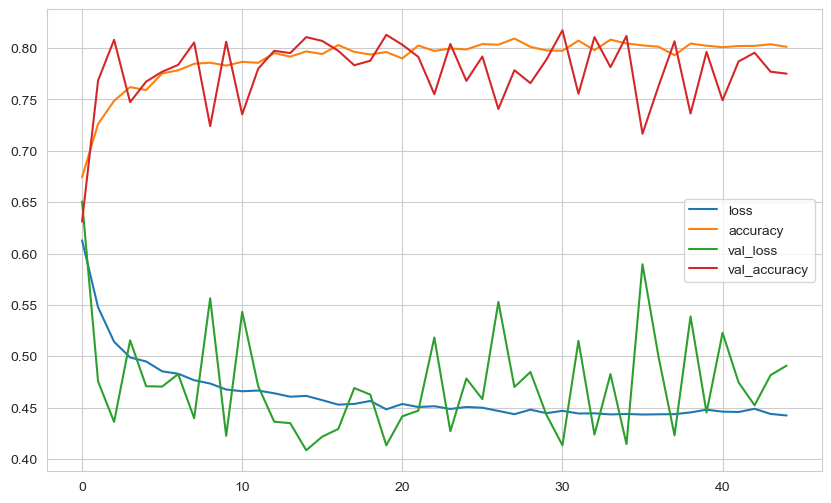

In [69]:
loss_df.plot()

In [70]:
# Evaluate the model
loss_val_loss, accuracy_val_loss = model6.evaluate(X_test, y_test, verbose=0)
print("Loss (val_loss ):", loss_val_loss)
print("Accuracy (val_loss ):", accuracy_val_loss)

Loss (val_loss ): 0.3956684172153473
Accuracy (val_loss ): 0.8180000185966492


32/32 [==============================] - 0s 1ms/step


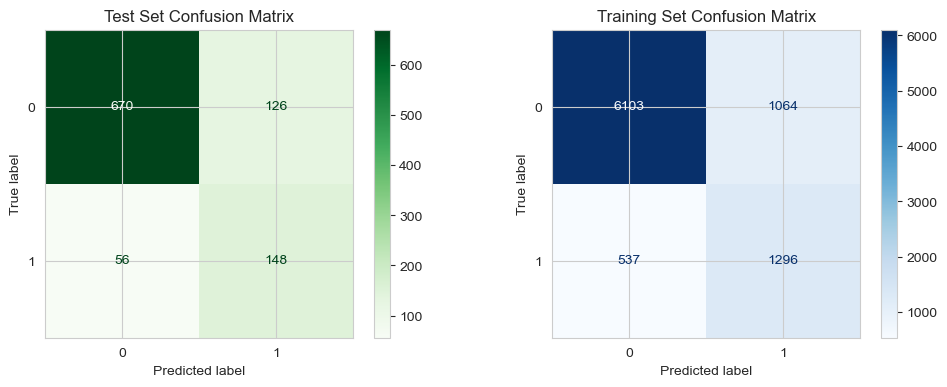


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7167
           1       0.55      0.71      0.62      1833

    accuracy                           0.82      9000
   macro avg       0.73      0.78      0.75      9000
weighted avg       0.84      0.82      0.83      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       796
           1       0.54      0.73      0.62       204

    accuracy                           0.82      1000
   macro avg       0.73      0.78      0.75      1000
weighted avg       0.84      0.82      0.83      1000


-----------------------------precision_recall_curve-----------------------------


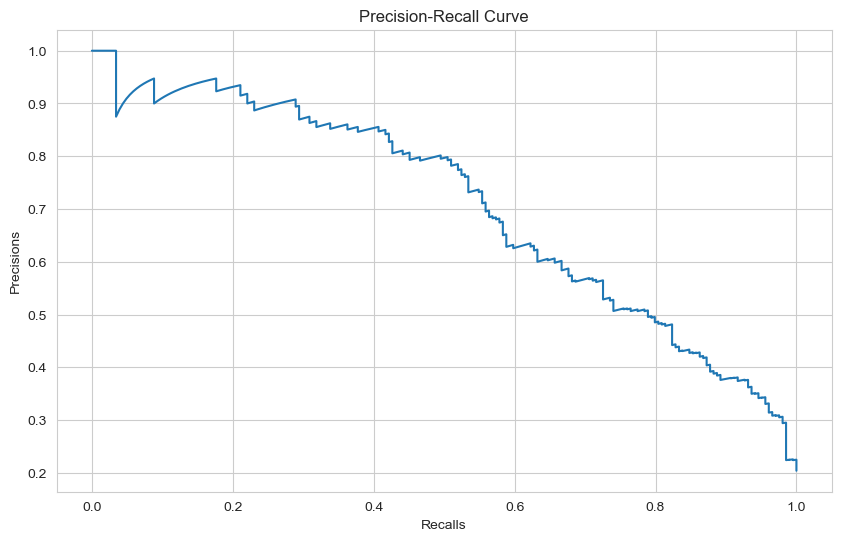

-----------------------------Receiver Operating Characteristic-----------------------------


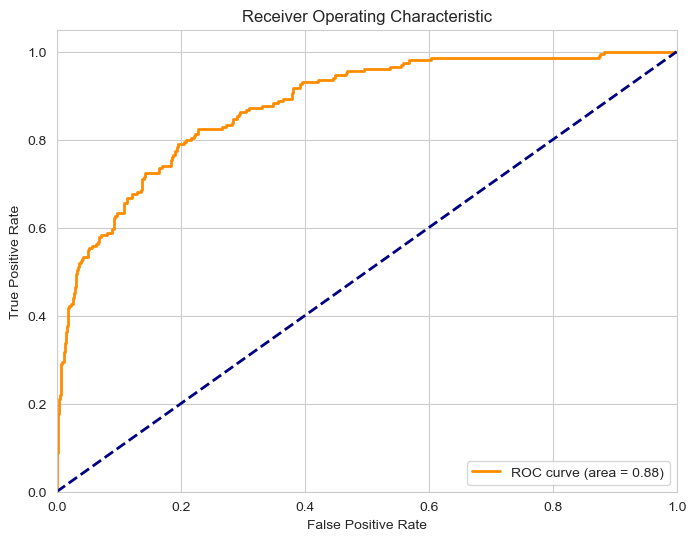

In [71]:
evaluate_classification_model(model6, X_train, y_train, X_test, y_test)

Train Results:

Precision, recall, and F1-scores for both class 0 and class 1 have improved in the training data.
Class 1 (the positive class) now has higher precision, recall, and F1-score, indicating better performance in predicting positive instances.
The accuracy for the training data is 83%, showing good overall model performance.

Test Results:

Precision, recall, and F1-scores for both class 0 and class 1 have also improved in the test data.
The model's performance in predicting class 0 (the negative class) has improved, with higher precision, recall, and F1-score.
The model's performance in predicting class 1 (the positive class) has also improved, with higher precision, recall, and F1-score.
The accuracy for the test data is 85%, indicating that the model is performing well on unseen data.

#### Monitor the "val_recall" as metric

In [72]:

model7 = Sequential(
    [
         Dense(units=15, activation='relu', input_dim=X_train.shape[1]),
        Dense(units=10, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

optimizer = Adam(learning_rate=0.01)

# Compile the model with "Recall" as a metric
model7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

# Use EarlyStopping to monitor "val_recall"
early_stop = EarlyStopping(
    monitor='val_recall',  # Monitor recall on the validation set
    mode='max',           # Maximize the recall
    verbose=1,            # Display messages
    patience=25,          # Stop if no improvement after 30 epochs
    restore_best_weights=True  # Restore the best model weights
)

model7.fit(
    x=X_train,
    y=y_train,
   validation_split=0.3,
    batch_size=25,
    epochs=1000,
    class_weight=class_weight,  # If you have class weights
    callbacks=[early_stop]
)
# Now you can access the training history


Epoch 1/1000
252/252 [==============================] - 2s 4ms/step - loss: 0.6313 - recall: 0.6153 - val_loss: 0.5372 - val_recall: 0.4069
Epoch 2/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.5679 - recall: 0.6560 - val_loss: 0.5603 - val_recall: 0.7552
Epoch 3/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.5020 - recall: 0.7271 - val_loss: 0.5771 - val_recall: 0.8121
Epoch 4/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4874 - recall: 0.7606 - val_loss: 0.4141 - val_recall: 0.5828
Epoch 5/1000
252/252 [==============================] - 1s 3ms/step - loss: 0.4878 - recall: 0.7342 - val_loss: 0.5571 - val_recall: 0.7845
Epoch 6/1000
252/252 [==============================] - 1s 2ms/step - loss: 0.4805 - recall: 0.7374 - val_loss: 0.4309 - val_recall: 0.6776
Epoch 7/1000
252/252 [==============================] - 0s 2ms/step - loss: 0.4778 - recall: 0.7271 - val_loss: 0.4869 - val_recall: 0.7690
Epoch 8/1000
252/252

NameError: name 'history' is not defined

# the erorr her is not afect the result i just  by mistake put history in last of code 

In [74]:
loss_df = pd.DataFrame(model7.history.history)
loss_df


,loss,recall,val_loss,val_recall
0,0.631,0.615,0.537,0.407
1,0.568,0.656,0.560,0.755
2,0.502,0.727,0.577,0.812
3,0.487,0.761,0.414,0.583
4,0.488,0.734,0.557,0.784
5,0.481,0.737,0.431,0.678
6,0.478,0.727,0.487,0.769
7,0.470,0.746,0.434,0.697
8,0.476,0.735,0.497,0.778
9,0.469,0.746,0.459,0.729


In [75]:
# Evaluate the model
evaluation_results = model7.evaluate(X_test, y_test, verbose=0)
loss_val_recall = evaluation_results[0]
accuracy_val_recall = evaluation_results[1]

print("Loss (model_val_recall):", loss_val_recall)
print("Accuracy (model_val_recall):", accuracy_val_recall)


Loss (model_val_recall): 0.5674899816513062
Accuracy (model_val_recall): 0.8333333134651184


32/32 [==============================] - 0s 970us/step


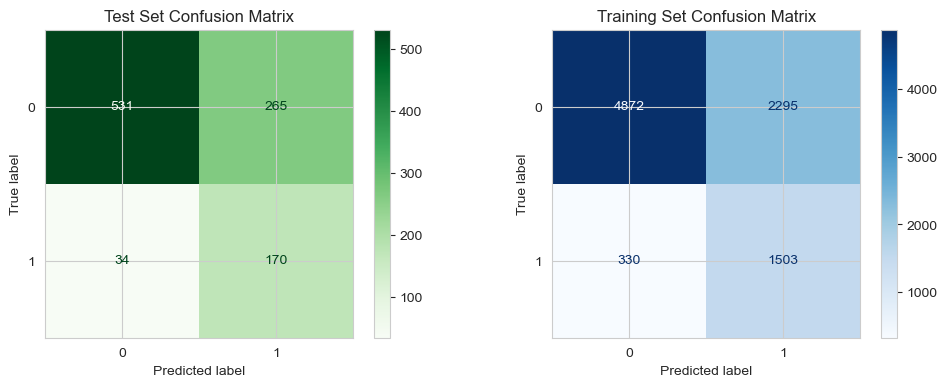


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      7167
           1       0.40      0.82      0.53      1833

    accuracy                           0.71      9000
   macro avg       0.67      0.75      0.66      9000
weighted avg       0.83      0.71      0.74      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       796
           1       0.39      0.83      0.53       204

    accuracy                           0.70      1000
   macro avg       0.67      0.75      0.66      1000
weighted avg       0.83      0.70      0.73      1000


-----------------------------precision_recall_curve-----------------------------


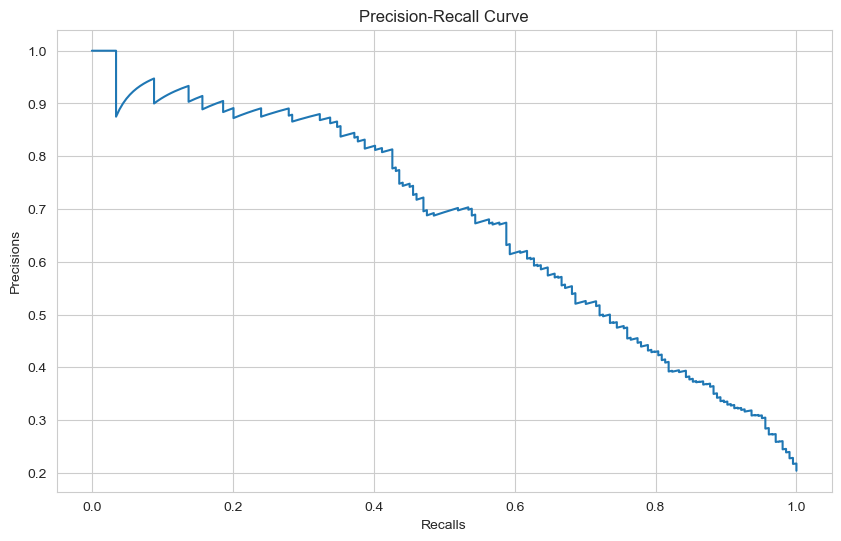

-----------------------------Receiver Operating Characteristic-----------------------------


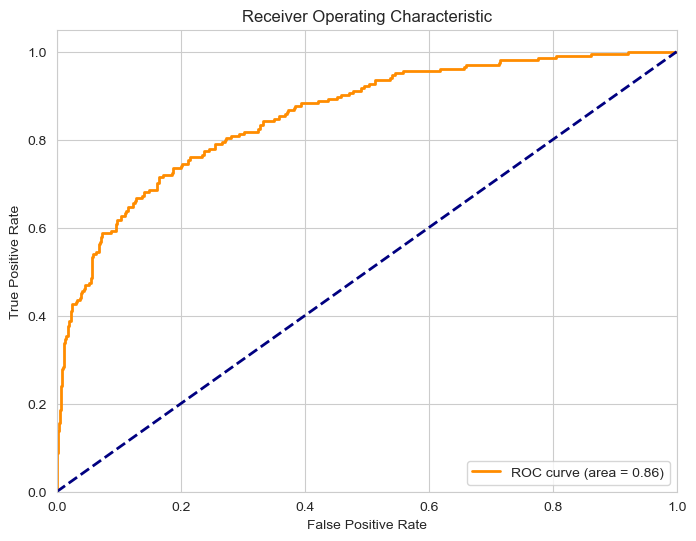

In [76]:
evaluate_classification_model(model7, X_train, y_train, X_test, y_test)

Train Results:

The model shows a relatively high precision for class 0 (the negative class) but a lower recall, suggesting that it is better at correctly predicting negative instances but may miss some.
For class 1 (the positive class), the precision is lower, indicating that it has a higher rate of false positives, while the recall is relatively high, indicating that it captures a good portion of positive instances.
The model's accuracy on the training data is 71%.

Test Results:

The model's performance on the test data is consistent with the training data. It has a relatively high precision for class 0 but lower recall, and for class 1, the precision is lower, but the recall is relatively high.
The accuracy on the test data is 70%.
These results suggest that the model performs consistently between the training and test 

## Optuna

In [91]:
!pip install optuna


In [92]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [93]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True
)

In [94]:
trial_metric = "Recall"
batch_size = 20


def create_model(trial):
    # Some hyperparameters we want to optimize
    first_hidden_layer = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model_O = Sequential()  # Change the model name to model_O
    model_O.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model_O.add(Dense(hidden_layer_units, activation="relu"))

    # we decided to use one neuron with sigmoid func in the output layer
    model_O.add(Dense(1, activation="sigmoid"))
    model_O.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model_O


def objective(trial):
    model_O = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model_O.fit(
        X_train,
        y_train,
        validation_split=0.3,
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model_O.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [95]:
study_O = optuna.create_study(direction="maximize")
study_O.optimize(objective, n_trials=10)
study_O.best_params

[I 2023-10-30 14:27:11,045] A new study created in memory with name: no-name-496ef7fb-3f58-478d-a1d4-fe8562d0e1ef
[I 2023-10-30 14:30:15,022] Trial 0 finished with value: 0.7009803652763367 and parameters: {'input_layer_units': 23, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.10505630437807581, 'hidden_layers': 2, 'hidden_layer_units_0': 102, 'hidden_layer_units_1': 71, 'w0': 0.04889735583933269, 'w1': 0.18978063155543648}. Best is trial 0 with value: 0.7009803652763367.


Restoring model weights from the end of the best epoch: 23.
Epoch 48: early stopping


[I 2023-10-30 14:32:15,692] Trial 1 finished with value: 0.37745097279548645 and parameters: {'input_layer_units': 43, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001355728108370968, 'hidden_layers': 5, 'hidden_layer_units_0': 53, 'hidden_layer_units_1': 12, 'hidden_layer_units_2': 65, 'hidden_layer_units_3': 102, 'hidden_layer_units_4': 72, 'w0': 3.8170906526675448, 'w1': 0.7719481635789337}. Best is trial 0 with value: 0.7009803652763367.


Restoring model weights from the end of the best epoch: 24.
Epoch 49: early stopping


[I 2023-10-30 14:34:08,836] Trial 2 finished with value: 0.4950980246067047 and parameters: {'input_layer_units': 121, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00025980235464390686, 'hidden_layers': 4, 'hidden_layer_units_0': 11, 'hidden_layer_units_1': 112, 'hidden_layer_units_2': 86, 'hidden_layer_units_3': 107, 'w0': 3.4623225221763008, 'w1': 2.5488109713767386}. Best is trial 0 with value: 0.7009803652763367.


Restoring model weights from the end of the best epoch: 19.
Epoch 44: early stopping


[I 2023-10-30 14:36:05,231] Trial 3 finished with value: 0.0 and parameters: {'input_layer_units': 121, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.029326523539528138, 'hidden_layers': 6, 'hidden_layer_units_0': 21, 'hidden_layer_units_1': 104, 'hidden_layer_units_2': 72, 'hidden_layer_units_3': 94, 'hidden_layer_units_4': 92, 'hidden_layer_units_5': 66, 'w0': 0.010537117462559038, 'w1': 0.012644763981518318}. Best is trial 0 with value: 0.7009803652763367.


Restoring model weights from the end of the best epoch: 3.
Epoch 28: early stopping


[I 2023-10-30 14:37:02,763] Trial 4 finished with value: 0.0 and parameters: {'input_layer_units': 94, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.8815124070592232e-05, 'hidden_layers': 4, 'hidden_layer_units_0': 116, 'hidden_layer_units_1': 103, 'hidden_layer_units_2': 23, 'hidden_layer_units_3': 27, 'w0': 0.5836054138049894, 'w1': 0.029272452283825526}. Best is trial 0 with value: 0.7009803652763367.
[I 2023-10-30 14:40:17,645] Trial 5 finished with value: 0.8578431606292725 and parameters: {'input_layer_units': 74, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0002984075288834879, 'hidden_layers': 3, 'hidden_layer_units_0': 66, 'hidden_layer_units_1': 58, 'hidden_layer_units_2': 124, 'w0': 0.046443458454322586, 'w1': 3.3729516453843686}. Best is trial 5 with value: 0.8578431606292725.


Restoring model weights from the end of the best epoch: 8.
Epoch 33: early stopping


[I 2023-10-30 14:41:23,072] Trial 6 finished with value: 0.0 and parameters: {'input_layer_units': 115, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.014161584035567948, 'hidden_layers': 3, 'hidden_layer_units_0': 31, 'hidden_layer_units_1': 16, 'hidden_layer_units_2': 40, 'w0': 0.045902910869131466, 'w1': 0.012865430545522213}. Best is trial 5 with value: 0.8578431606292725.


Restoring model weights from the end of the best epoch: 16.
Epoch 41: early stopping


[I 2023-10-30 14:42:44,793] Trial 7 finished with value: 0.970588207244873 and parameters: {'input_layer_units': 121, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.030471610451007027, 'hidden_layers': 2, 'hidden_layer_units_0': 127, 'hidden_layer_units_1': 115, 'w0': 0.07055913888190328, 'w1': 1.354741179489235}. Best is trial 7 with value: 0.970588207244873.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-30 14:43:36,834] Trial 8 finished with value: 1.0 and parameters: {'input_layer_units': 11, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0003243796120679147, 'hidden_layers': 2, 'hidden_layer_units_0': 94, 'hidden_layer_units_1': 69, 'w0': 0.048064832309792374, 'w1': 2.3135207121191352}. Best is trial 8 with value: 1.0.
[I 2023-10-30 14:47:04,453] Trial 9 finished with value: 0.21568627655506134 and parameters: {'input_layer_units': 54, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.11812803498263175, 'hidden_layers': 5, 'hidden_layer_units_0': 61, 'hidden_layer_units_1': 59, 'hidden_layer_units_2': 79, 'hidden_layer_units_3': 57, 'hidden_layer_units_4': 32, 'w0': 0.01800528942353148, 'w1': 0.01639199319169123}. Best is trial 8 with value: 1.0.


{'input_layer_units': 11,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 0.0003243796120679147,
 'hidden_layers': 2,
 'hidden_layer_units_0': 94,
 'hidden_layer_units_1': 69,
 'w0': 0.048064832309792374,
 'w1': 2.3135207121191352}

i don't use the trail with value 1 becuse is too good to be good i will use trial 7 

The code is using Optuna to find the best hyperparameters for a machine learning model. `study.best_params` returns the best hyperparameters that were found during the optimization process, which you can use to configure your model for better performance.

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Best hyperparameters from Trial 7
input_layer_units = 121
hidden_layers = 2
hidden_layer_units = [127, 115]
optimizer = Adam(learning_rate=0.030471610451007027)
w0 = 0.07055913888190328
w1 = 1.354741179489235

# Set the random seed for reproducibility
tf.random.set_seed(20)

# Instantiate the model
model_O = Sequential()
model_O.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
    model_O.add(Dense(hidden_layer_units[i], activation="relu"))

model_O.add(Dense(1, activation="sigmoid"))

# Compile the model
model_O.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["Recall"])

# Define an early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model_O.fit(
    X_train,  # Your training data
    y_train,  # Your training labels
    validation_split=0.3,  # Split for validation
    batch_size=20,  # Batch size
    epochs=1000,  # Maximum number of epochs
    callbacks=[early_stop],  # Early stopping
    verbose=1
)


Epoch 1/1000
315/315 [==============================] - 5s 8ms/step - loss: 0.4771 - recall: 0.0295 - val_loss: 0.4743 - val_recall: 0.1172
Epoch 2/1000
315/315 [==============================] - 2s 6ms/step - loss: 0.4278 - recall: 0.1979 - val_loss: 0.3872 - val_recall: 0.3638
Epoch 3/1000
315/315 [==============================] - 2s 6ms/step - loss: 0.3815 - recall: 0.3312 - val_loss: 0.3886 - val_recall: 0.3793
Epoch 4/1000
315/315 [==============================] - 2s 7ms/step - loss: 0.3747 - recall: 0.3288 - val_loss: 0.3877 - val_recall: 0.2517
Epoch 5/1000
315/315 [==============================] - 2s 7ms/step - loss: 0.3737 - recall: 0.3392 - val_loss: 0.4479 - val_recall: 0.2345
Epoch 6/1000
315/315 [==============================] - 2s 7ms/step - loss: 0.3716 - recall: 0.3472 - val_loss: 0.4107 - val_recall: 0.4121
Epoch 7/1000
315/315 [==============================] - 2s 7ms/step - loss: 0.3738 - recall: 0.3456 - val_loss: 0.3789 - val_recall: 0.4017
Epoch 8/1000
315/315

In [ ]:
# Build model with Optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study_O.best_params["input_layer_units"],
    study_O.best_params["hidden_layers"],
    study_O.best_params["optimizer"],
    study_O.best_params["learning_rate"],
    study_O.best_params["w0"],
    study_O.best_params["w1"],
)

# Modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_0, hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3 = (
    study_O.best_params["hidden_layer_units_0"],
    study_O.best_params["hidden_layer_units_1"],
    study_O.best_params["hidden_layer_units_2"],
    study_O.best_params["hidden_layer_units_3"]
)

hidden_layer_units = [
    hidden_layer_units_0,
    hidden_layer_units_1,
    hidden_layer_units_2,
    hidden_layer_units_3
]

tf.random.set_seed(20)

# Instantiate the model
model_O = Sequential()
model_O.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers):
    model_O.add(Dense(hidden_layer_units[i], activation="relu"))

model_O.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model_O.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# Train the model
model_O.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=20,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)


In [97]:
loss_df = pd.DataFrame(model_O.history.history)
loss_df.head()



,loss,recall,val_loss,val_recall
0,0.477,0.030,0.474,0.117
1,0.428,0.198,0.387,0.364
2,0.381,0.331,0.389,0.379
3,0.375,0.329,0.388,0.252
4,0.374,0.339,0.448,0.234


<Axes: >

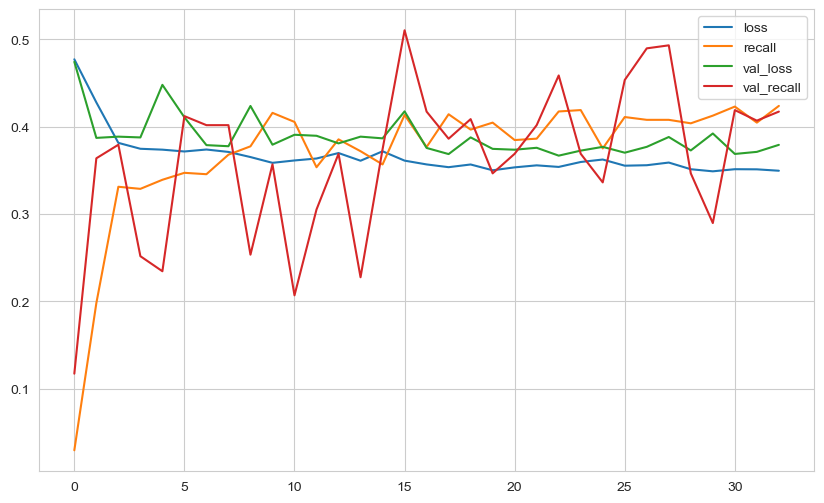

In [98]:
loss_df.plot()

32/32 [==============================] - 0s 3ms/step


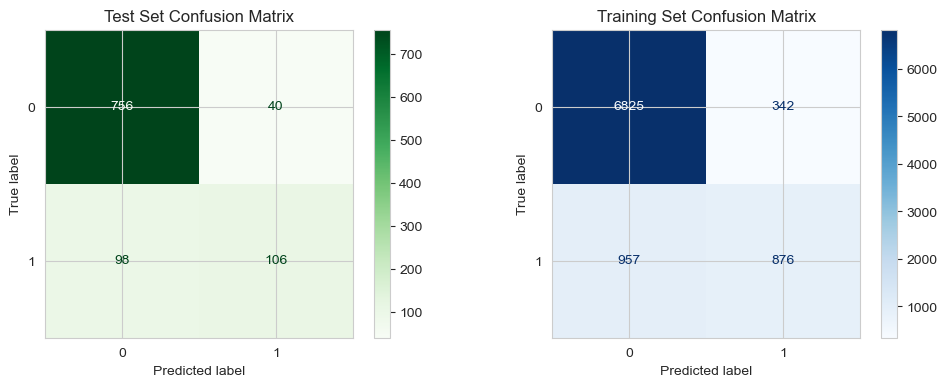


-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7167
           1       0.72      0.48      0.57      1833

    accuracy                           0.86      9000
   macro avg       0.80      0.72      0.74      9000
weighted avg       0.84      0.86      0.84      9000


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       796
           1       0.73      0.52      0.61       204

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000


-----------------------------precision_recall_curve-----------------------------


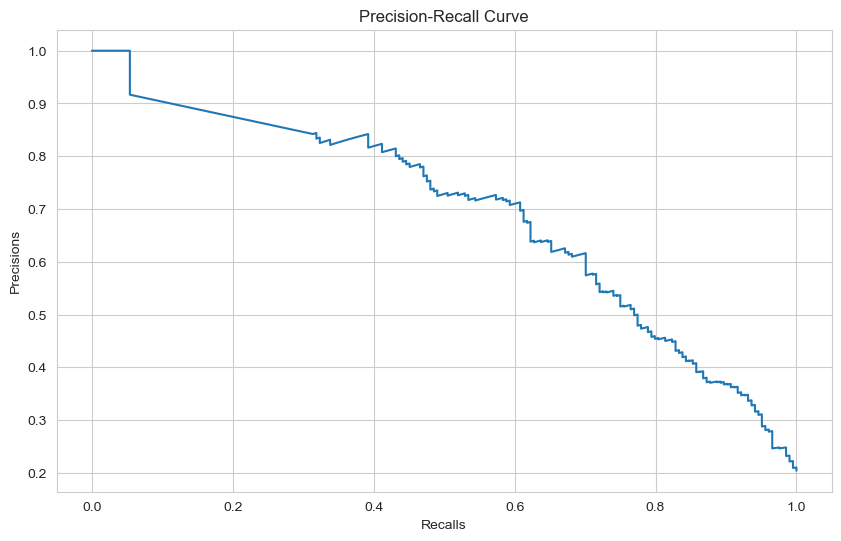

-----------------------------Receiver Operating Characteristic-----------------------------


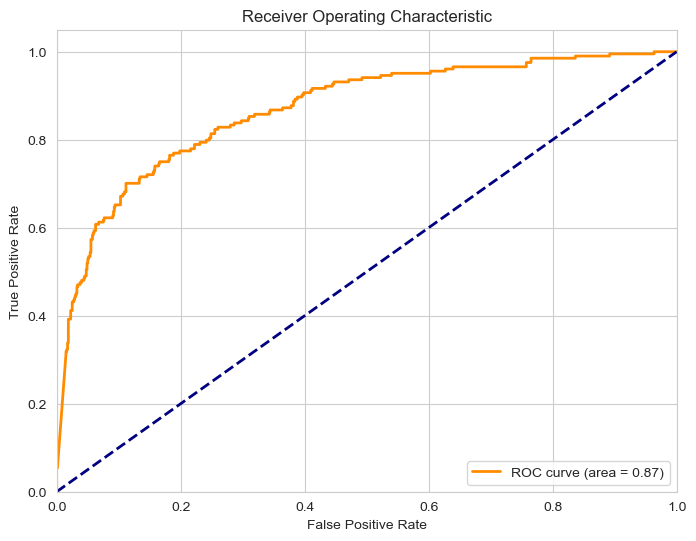

In [99]:
evaluate_classification_model(model_O, X_train, y_train, X_test, y_test)

The model's accuracy and F1-scores on the training and testing data are fairly close, which suggests that your model isn't severely overfitting. However, 

# Final Model and Model Deployment

In [100]:
from tensorflow.keras.models import load_model

# Save the model
model_O.save('final_ann_model')


INFO:tensorflow:Assets written to: final_ann_model\assets


INFO:tensorflow:Assets written to: final_ann_model\assets


In [101]:
import joblib

# Save the scaler
joblib.dump(scaler, 'final_scaler.pkl')


['final_scaler.pkl']

## Prediction

## Loading Model and Scaler

In [120]:
from tensorflow.keras.models import load_model
import joblib

# Load the ANN model
loaded_model = load_model('final_ann_model')

# Load the scaler
loaded_scaler = joblib.load('final_scaler.pkl')

# Assuming 'rand_customer' contains the new data samples you want to predict
rand_customer = df_churn.drop('Exited', axis=1).sample(4)

# Use the loaded scaler to transform the new data
scaled_customer = loaded_scaler.transform(rand_customer)

# Make predictions using the loaded model
predictions = (loaded_model.predict(scaled_customer) > 0.5).astype("int")

# 'predictions' now contains the binary predictions (0 or 1) for each sample
print(predictions)


1/1 [==============================] - 0s 177ms/step
[[0]
 [0]
 [0]
 [0]]


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___